In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set styling for visualizations
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')


## Data Loading and Initial Exploration

Dataset shape: (3000, 15)

First few rows of the dataset:


Year   District  Avg_Temperature_C  Annual_Rainfall_mm  AQI  \
0  2025   Satkhira              27.06              4044.6  257   
1  2018    Tangail              25.86              1659.1  222   
2  2013  Sunamganj              25.20              3618.1   56   
3  2005  Sirajganj              27.85              4031.3  171   
4  2013   Barishal              29.94              3844.4  259   

   Forest_Cover_Percent  River_Water_Level_m  Cyclone_Count  \
0                  9.36                 5.89              1   
1                 29.12                 8.74              1   
2                 24.01                 8.45              1   
3                 25.68                 4.04              2   
4                  8.13                 9.83              3   

   Flood_Impact_Score  Drought_Severity  Agricultural_Yield_ton_per_hectare  \
0                6.01              9.25                                5.21   
1                9.55              6.24                                4.28   
2                7.47              4.83                                2.90   
3                1.80              5.43                                5.20   
4                0.10              9.89                                4.65   

   Coastal_Erosion_m_per_year  Urbanization_Rate_Percent  \
0                        1.15                      54.15   
1                        2.09                      47.95   
2                        4.41                      65.13   
3                        1.10                      32.84   
4                        4.17                      65.95   

   Carbon_Emission_Metric_Tons_per_Capita  Renewable_Energy_Usage_Percent  
0                                    1.20                           18.20  
1                                    2.02                           16.47  
2                                    1.77                           11.23  
3                                    0.69                           14.80  
4                                    1.33                           19.98


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    3000 non-null   int64  
 1   District                                3000 non-null   object 
 2   Avg_Temperature_C                       3000 non-null   float64
 3   Annual_Rainfall_mm                      3000 non-null   float64
 4   AQI                                     3000 non-null   int64  
 5   Forest_Cover_Percent                    3000 non-null   float64
 6   River_Water_Level_m                     3000 non-null   float64
 7   Cyclone_Count                           3000 non-null   int64  
 8   Flood_Impact_Score                      3000 non-null   float64
 9   Drought_Severity                        3000 non-null   float64
 10  Agricultural_Yield_ton_per_

None


Summary statistics:


Year  Avg_Temperature_C  Annual_Rainfall_mm          AQI  \
count  3000.000000        3000.000000         3000.000000  3000.000000   
mean   2007.648000          28.011510         2994.914900   173.606333   
std      10.317279           2.315083         1153.858137    71.900162   
min    1990.000000          24.000000         1003.900000    50.000000   
25%    1999.000000          26.020000         1989.675000   112.000000   
50%    2008.000000          28.005000         2998.100000   171.000000   
75%    2017.000000          30.062500         3983.450000   236.000000   
max    2025.000000          32.000000         4998.100000   300.000000   

       Forest_Cover_Percent  River_Water_Level_m  Cyclone_Count  \
count           3000.000000          3000.000000    3000.000000   
mean              17.425540             5.402553       2.475333   
std                7.224026             2.610141       1.716306   
min                5.010000             1.000000       0.000000   
25%               11.077500             3.160000       1.000000   
50%               17.500000             5.365000       2.000000   
75%               23.682500             7.680000       4.000000   
max               29.990000             9.990000       5.000000   

       Flood_Impact_Score  Drought_Severity  \
count         3000.000000       3000.000000   
mean             5.013540          4.976207   
std              2.932409          2.926938   
min              0.000000          0.000000   
25%              2.450000          2.367500   
50%              5.080000          4.945000   
75%              7.582500          7.570000   
max             10.000000         10.000000   

       Agricultural_Yield_ton_per_hectare  Coastal_Erosion_m_per_year  \
count                         3000.000000                 3000.000000   
mean                             4.033920                    2.507380   
std                              0.867121                    1.440868   
min                              2.500000                    0.000000   
25%                              3.297500                    1.260000   
50%                              4.055000                    2.470000   
75%                              4.780000                    3.760000   
max                              5.500000                    5.000000   

       Urbanization_Rate_Percent  Carbon_Emission_Metric_Tons_per_Capita  \
count                3000.000000                             3000.000000   
mean                   50.486133                                1.352603   
std                    16.995358                                0.667416   
min                    20.040000                                0.200000   
25%                    36.302500                                0.770000   
50%                    50.700000                                1.350000   
75%                    65.152500                                1.932500   
max                    79.970000                                2.500000   

       Renewable_Energy_Usage_Percent  
count                     3000.000000  
mean                        10.898157  
std                          5.236656  
min                          2.010000  
25%                          6.287500  
50%                         10.790000  
75%                         15.512500  
max                         20.000000


Missing values by column:


Year                                      0
District                                  0
Avg_Temperature_C                         0
Annual_Rainfall_mm                        0
AQI                                       0
Forest_Cover_Percent                      0
River_Water_Level_m                       0
Cyclone_Count                             0
Flood_Impact_Score                        0
Drought_Severity                          0
Agricultural_Yield_ton_per_hectare        0
Coastal_Erosion_m_per_year                0
Urbanization_Rate_Percent                 0
Carbon_Emission_Metric_Tons_per_Capita    0
Renewable_Energy_Usage_Percent            0
dtype: int64


Time range: 1990 - 2025
Number of unique districts: 54
Number of unique years: 36


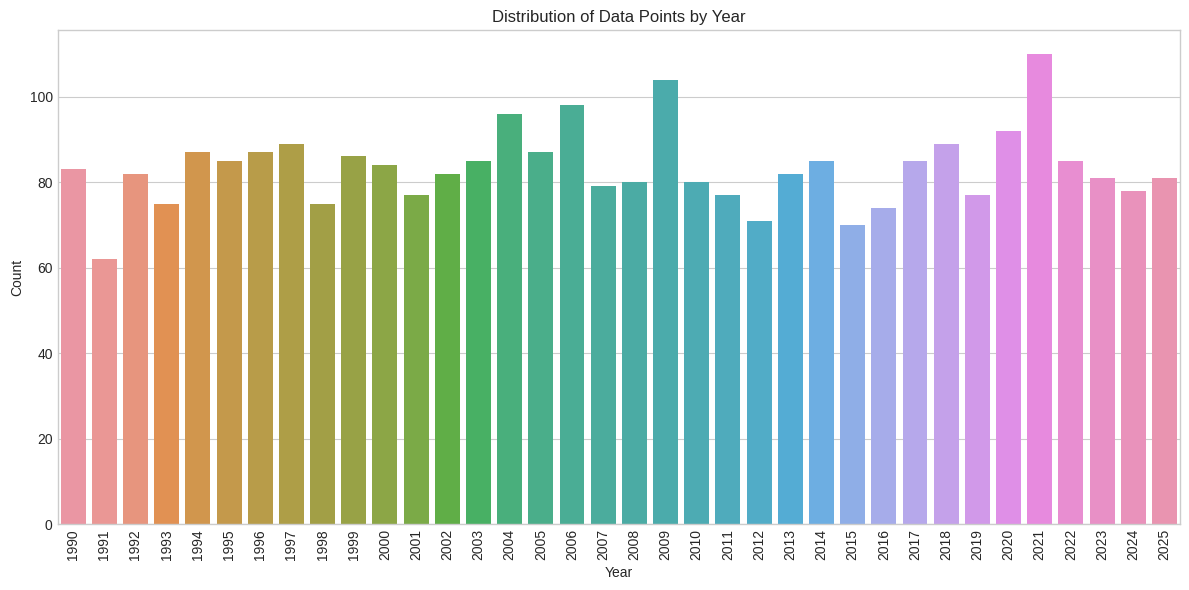

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/bangladesh-climate-change-simulation-dataset/Bangladesh_Environmental_Climate_Change_Impact.csv")

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nData types and non-null counts:")
display(df.info())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values by column:")
display(df.isnull().sum())

# Check unique years and districts
print(f"\nTime range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of unique districts: {df['District'].nunique()}")
print(f"Number of unique years: {df['Year'].nunique()}")

# Create a year distribution to see data distribution over time
plt.figure(figsize=(12, 6))
year_counts = df['Year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Distribution of Data Points by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Data Preprocessing

In [3]:
# Create time-based features
df['Decade'] = (df['Year'] // 10) * 10
df['Period'] = pd.cut(df['Year'], 
                     bins=[1989, 2000, 2010, 2020, 2025], 
                     labels=['1990-2000', '2001-2010', '2011-2020', '2021-2025'])

# Check for outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Function to detect and handle outliers
def handle_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = z_scores > threshold
    print(f"{column}: {sum(outliers)} outliers detected")
    return outliers

# Check outliers in each numeric column
print("Outlier detection:")
for col in numeric_cols:
    if col not in ['Year', 'Decade']:
        outliers = handle_outliers(df, col)

# Instead of removing outliers, we'll note them for analysis
# Create a function to identify districts with extreme climate conditions
def identify_extreme_conditions(df, column, top_n=5):
    highest = df.nlargest(top_n, column)[['Year', 'District', column]]
    lowest = df.nsmallest(top_n, column)[['Year', 'District', column]]
    return highest, lowest

# Example: Identify districts with extreme temperatures
high_temp, low_temp = identify_extreme_conditions(df, 'Avg_Temperature_C')
print("\nDistricts with highest average temperatures:")
display(high_temp)
print("\nDistricts with lowest average temperatures:")
display(low_temp)


Outlier detection:
Avg_Temperature_C: 0 outliers detected
Annual_Rainfall_mm: 0 outliers detected
AQI: 0 outliers detected
Forest_Cover_Percent: 0 outliers detected
River_Water_Level_m: 0 outliers detected
Cyclone_Count: 0 outliers detected
Flood_Impact_Score: 0 outliers detected
Drought_Severity: 0 outliers detected
Agricultural_Yield_ton_per_hectare: 0 outliers detected
Coastal_Erosion_m_per_year: 0 outliers detected
Urbanization_Rate_Percent: 0 outliers detected
Carbon_Emission_Metric_Tons_per_Capita: 0 outliers detected
Renewable_Energy_Usage_Percent: 0 outliers detected

Districts with highest average temperatures:


Year      District  Avg_Temperature_C
88    1993  Khagrachhari              32.00
573   2020      Kurigram              32.00
2388  2004  Brahmanbaria              32.00
2970  1996         Pabna              32.00
1945  1991     Gaibandha              31.99


Districts with lowest average temperatures:


Year     District  Avg_Temperature_C
415   2011  Lalmonirhat              24.00
1817  2018    Manikganj              24.00
2254  2010      Naogaon              24.00
982   2022   Shariatpur              24.01
1240  2017       Natore              24.01

## Exploratory Data Analysis: Temporal Analysis

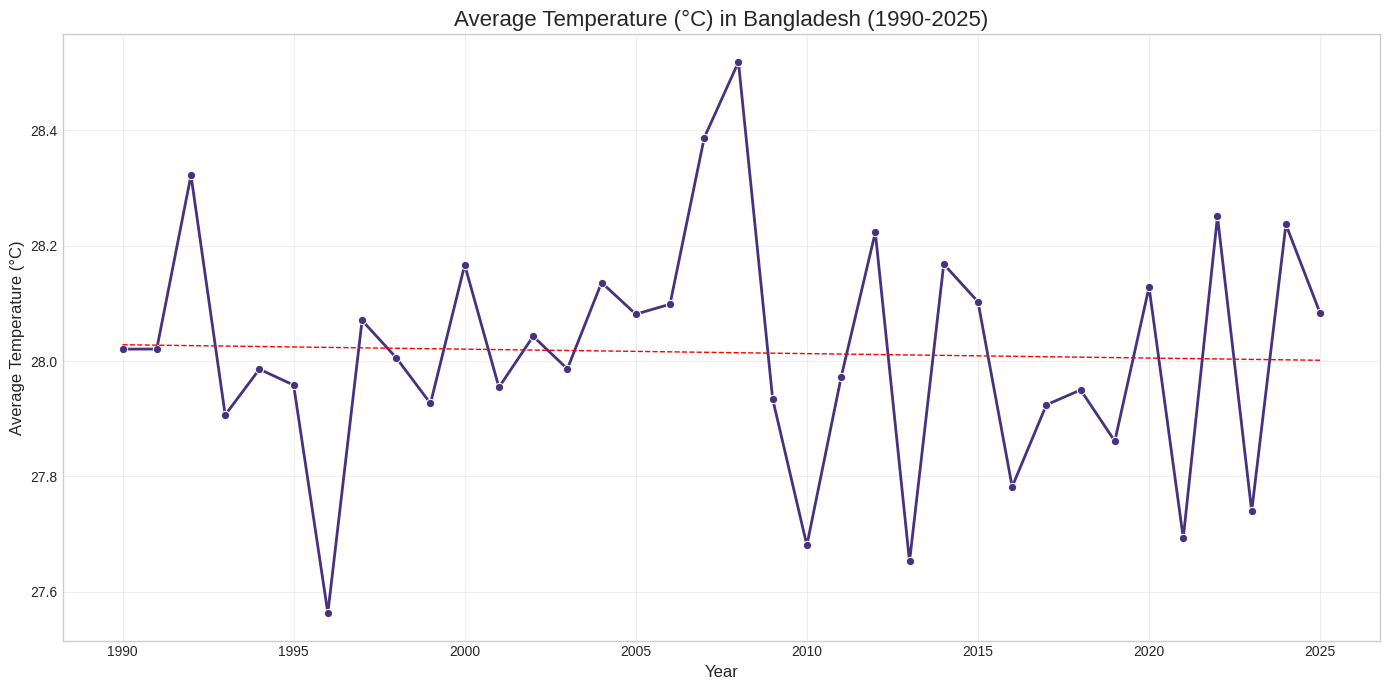

Average Temperature (°C) shows a decreasing trend over time.
Average change per year: -0.0008


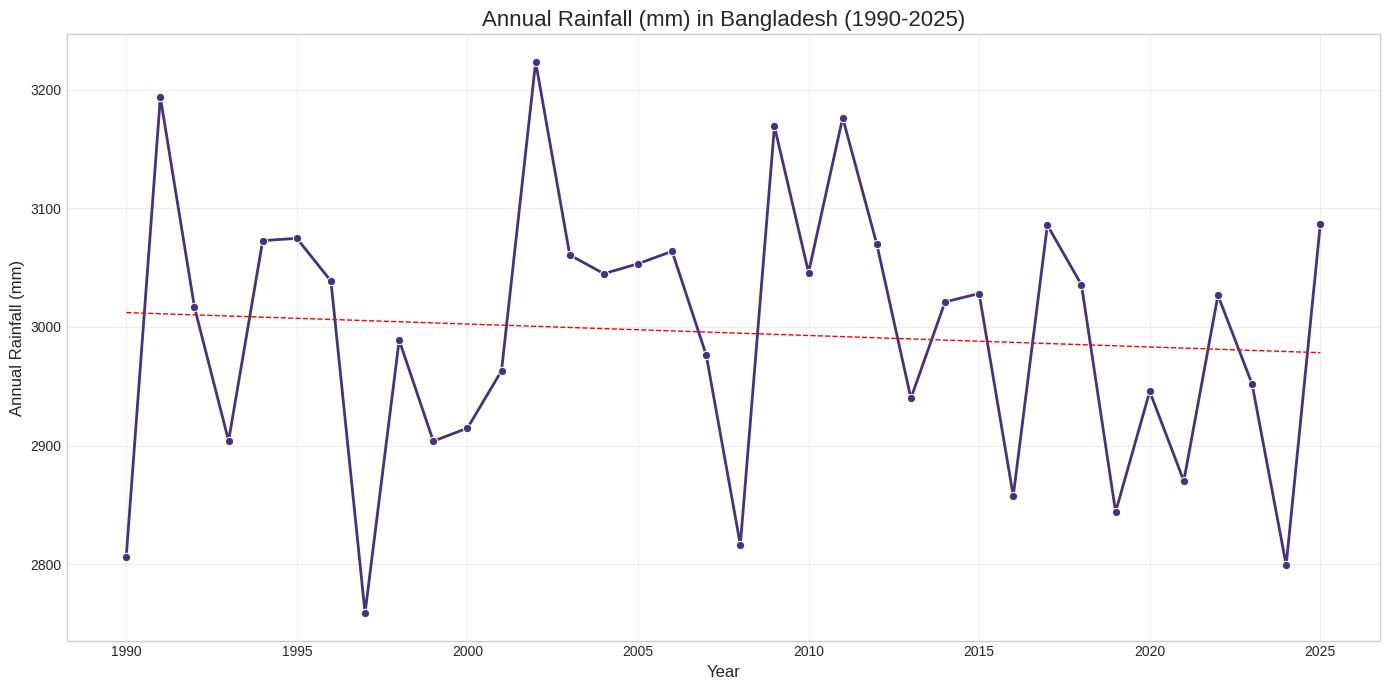

Annual Rainfall (mm) shows a decreasing trend over time.
Average change per year: -0.9654


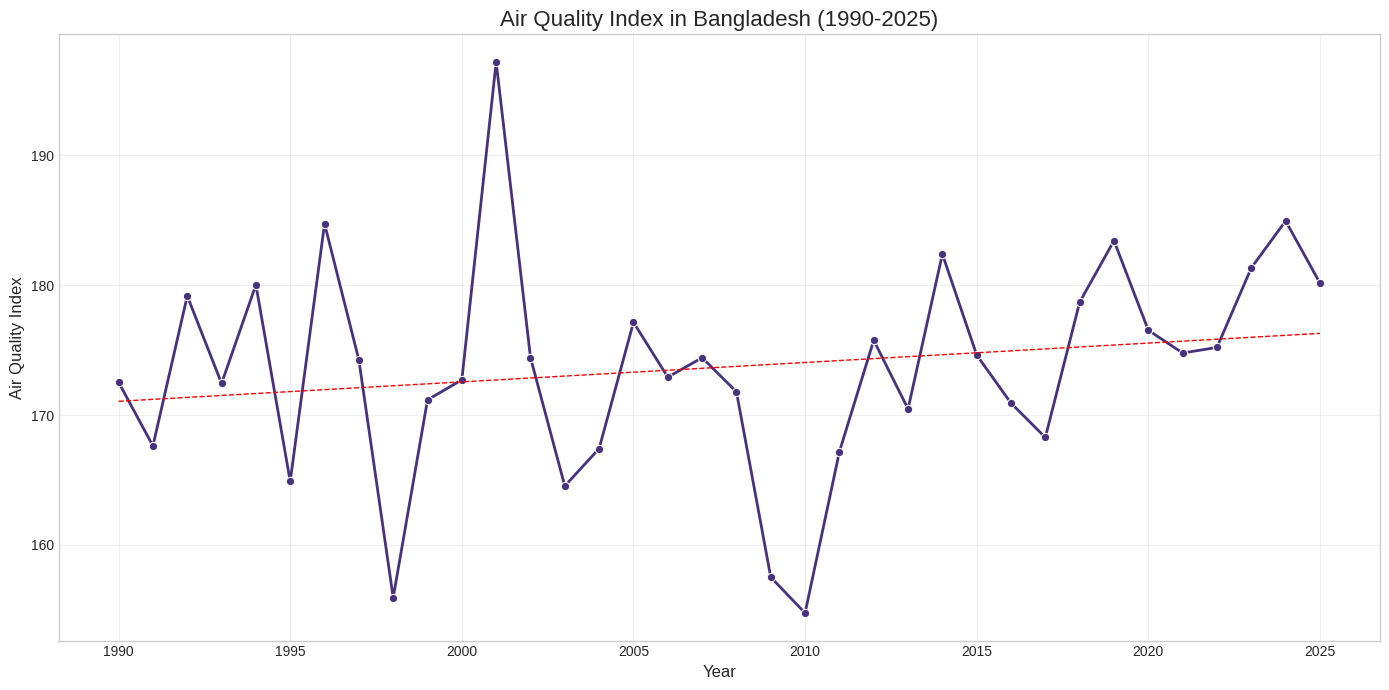

Air Quality Index shows a increasing trend over time.
Average change per year: 0.1493


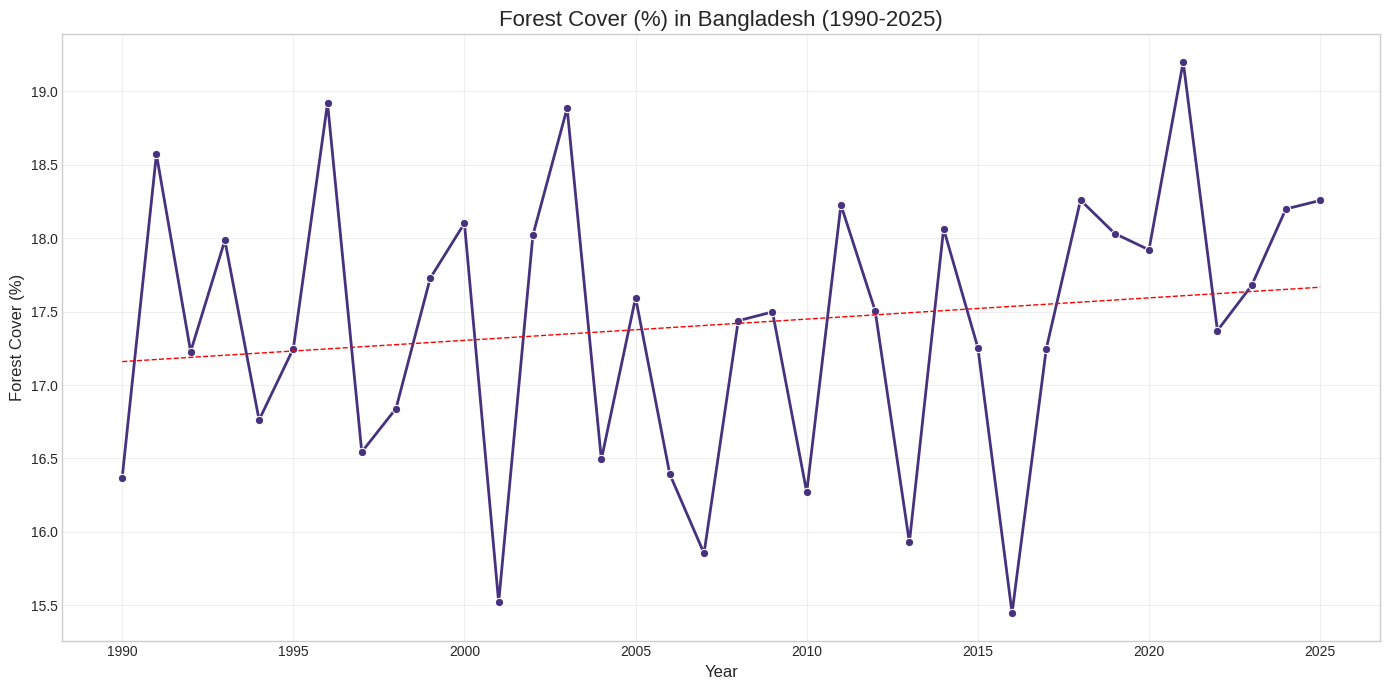

Forest Cover (%) shows a increasing trend over time.
Average change per year: 0.0145


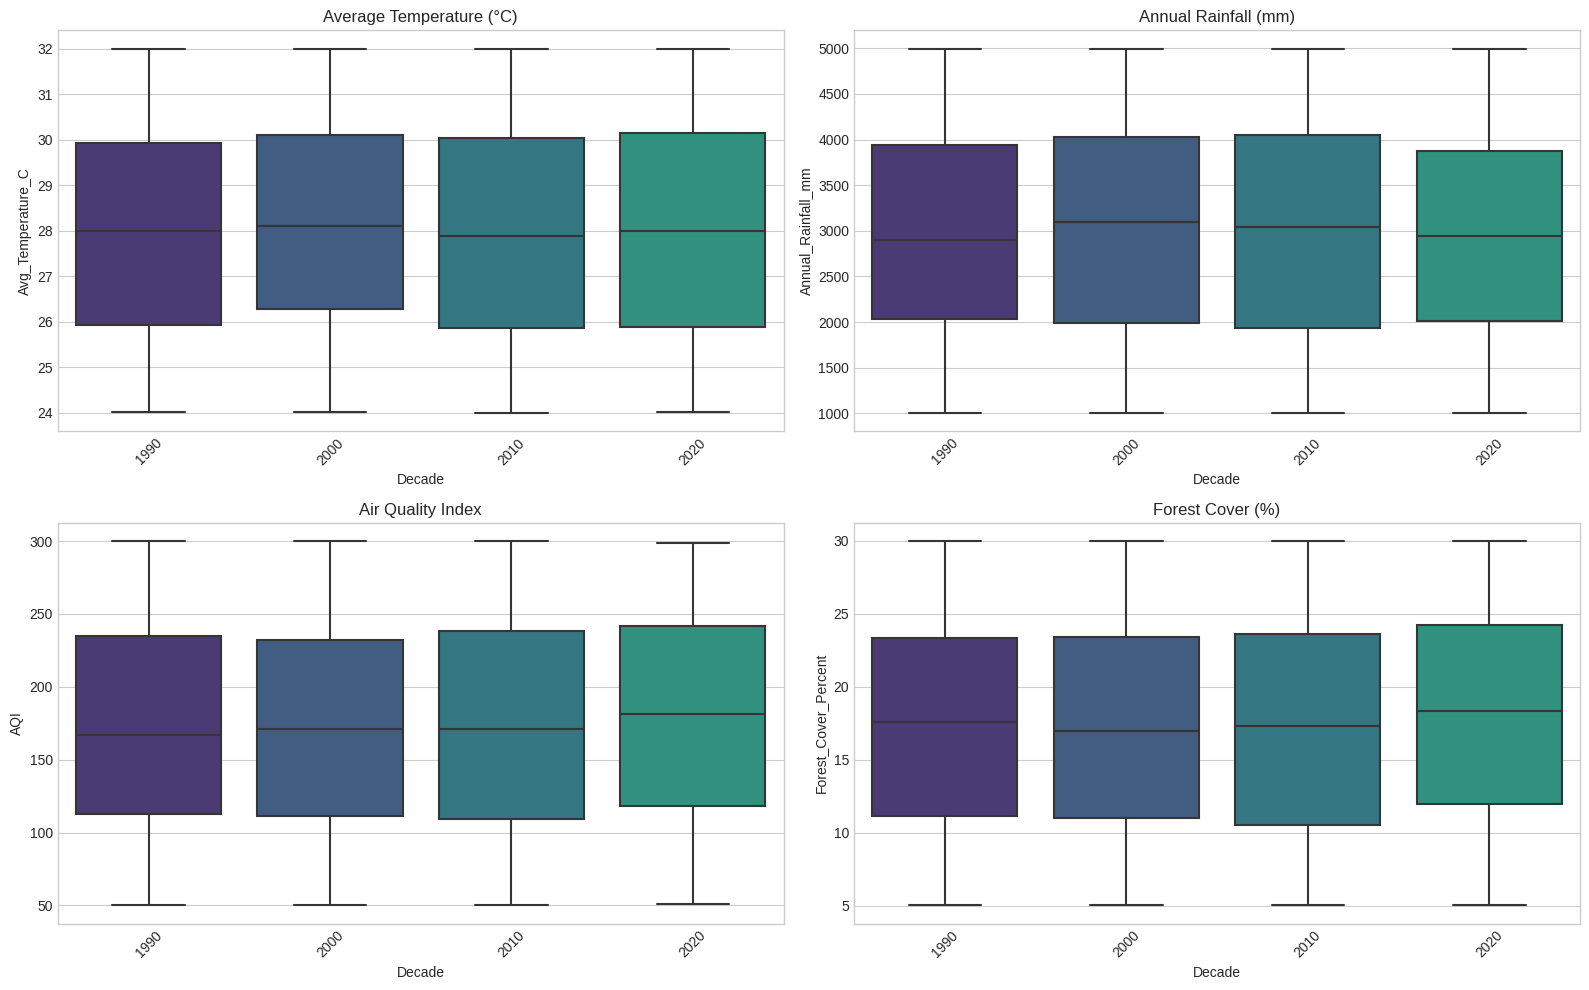

In [4]:
# Time series analysis of climate variables
def plot_climate_trend(df, column, title):
    plt.figure(figsize=(14, 7))
    
    # Calculate yearly averages
    yearly_avg = df.groupby('Year')[column].mean().reset_index()
    
    # Plot the trend
    sns.lineplot(x='Year', y=column, data=yearly_avg, marker='o', linewidth=2)
    
    # Add trend line
    z = np.polyfit(yearly_avg['Year'], yearly_avg[column], 1)
    p = np.poly1d(z)
    plt.plot(yearly_avg['Year'], p(yearly_avg['Year']), "r--", linewidth=1)
    
    plt.title(f'{title} in Bangladesh (1990-2025)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(title, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate and print the trend
    slope = z[0]
    direction = "increasing" if slope > 0 else "decreasing"
    print(f"{title} shows a {direction} trend over time.")
    print(f"Average change per year: {slope:.4f}")

# Analyze temperature trends
plot_climate_trend(df, 'Avg_Temperature_C', 'Average Temperature (°C)')

# Analyze rainfall trends
plot_climate_trend(df, 'Annual_Rainfall_mm', 'Annual Rainfall (mm)')

# Analyze AQI trends
plot_climate_trend(df, 'AQI', 'Air Quality Index')

# Analyze forest cover trends
plot_climate_trend(df, 'Forest_Cover_Percent', 'Forest Cover (%)')

# Compare climate variables across decades
plt.figure(figsize=(16, 10))

# Create subplots for different climate variables
variables = ['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 'Forest_Cover_Percent']
titles = ['Average Temperature (°C)', 'Annual Rainfall (mm)', 
          'Air Quality Index', 'Forest Cover (%)']

for i, (var, title) in enumerate(zip(variables, titles)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Decade', y=var, data=df)
    plt.title(title)
    plt.xlabel('Decade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Exploratory Data Analysis: Spatial Analysis

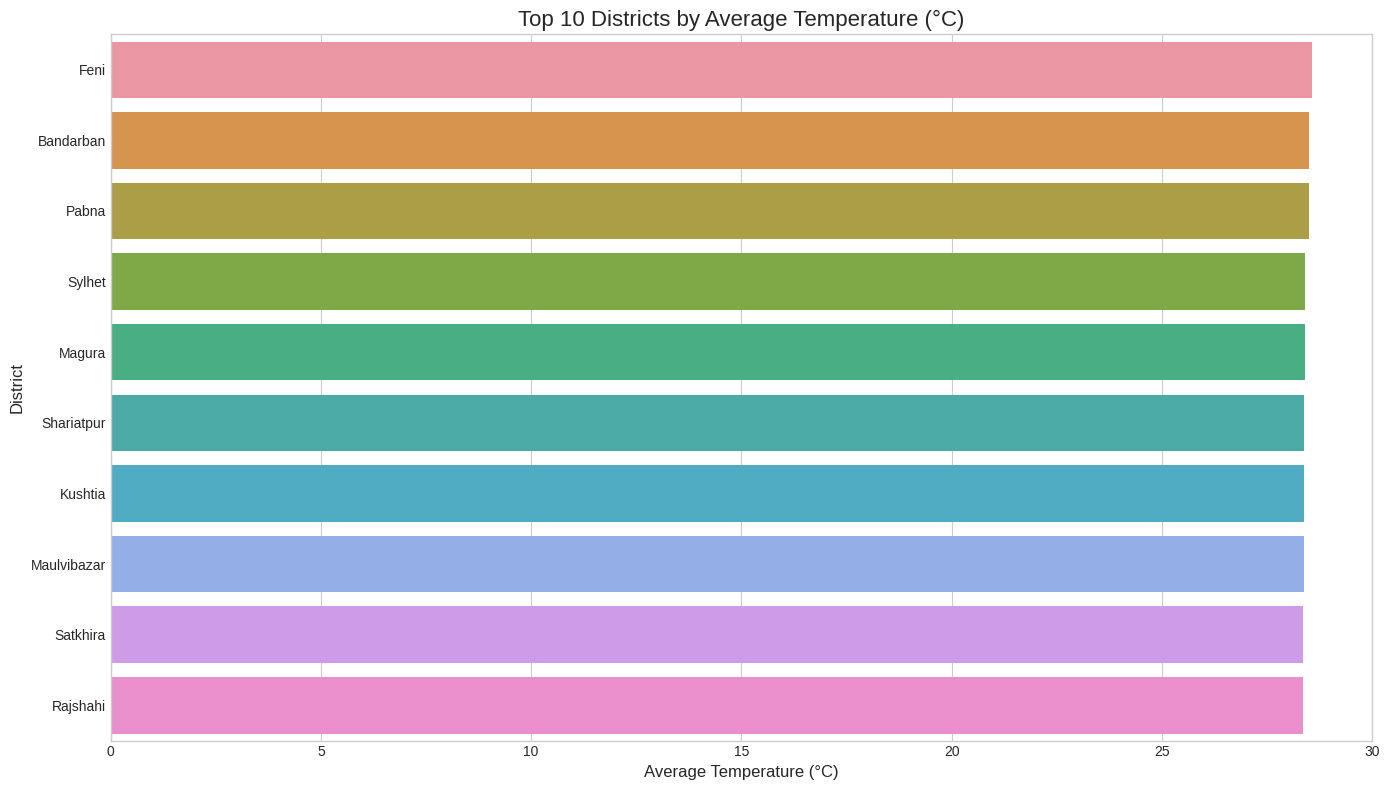

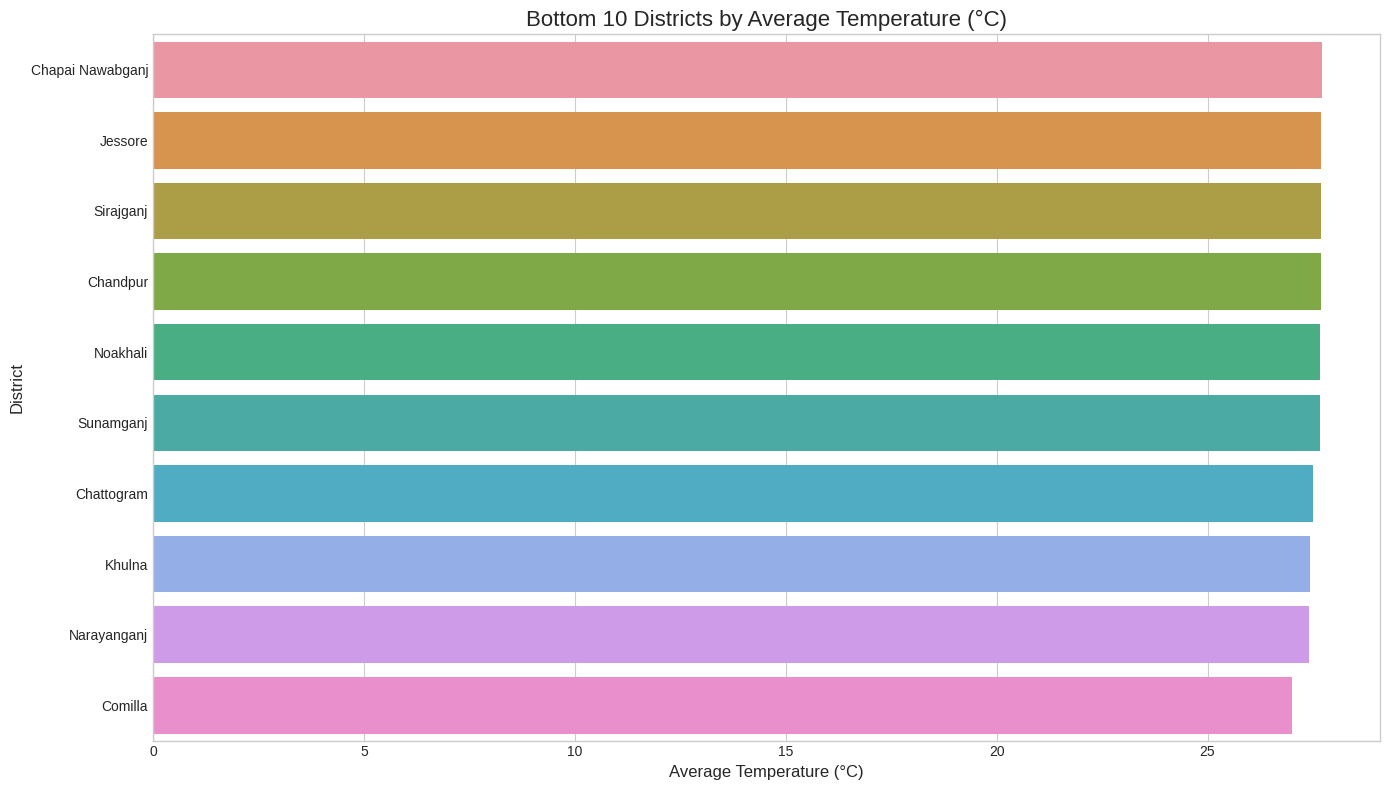

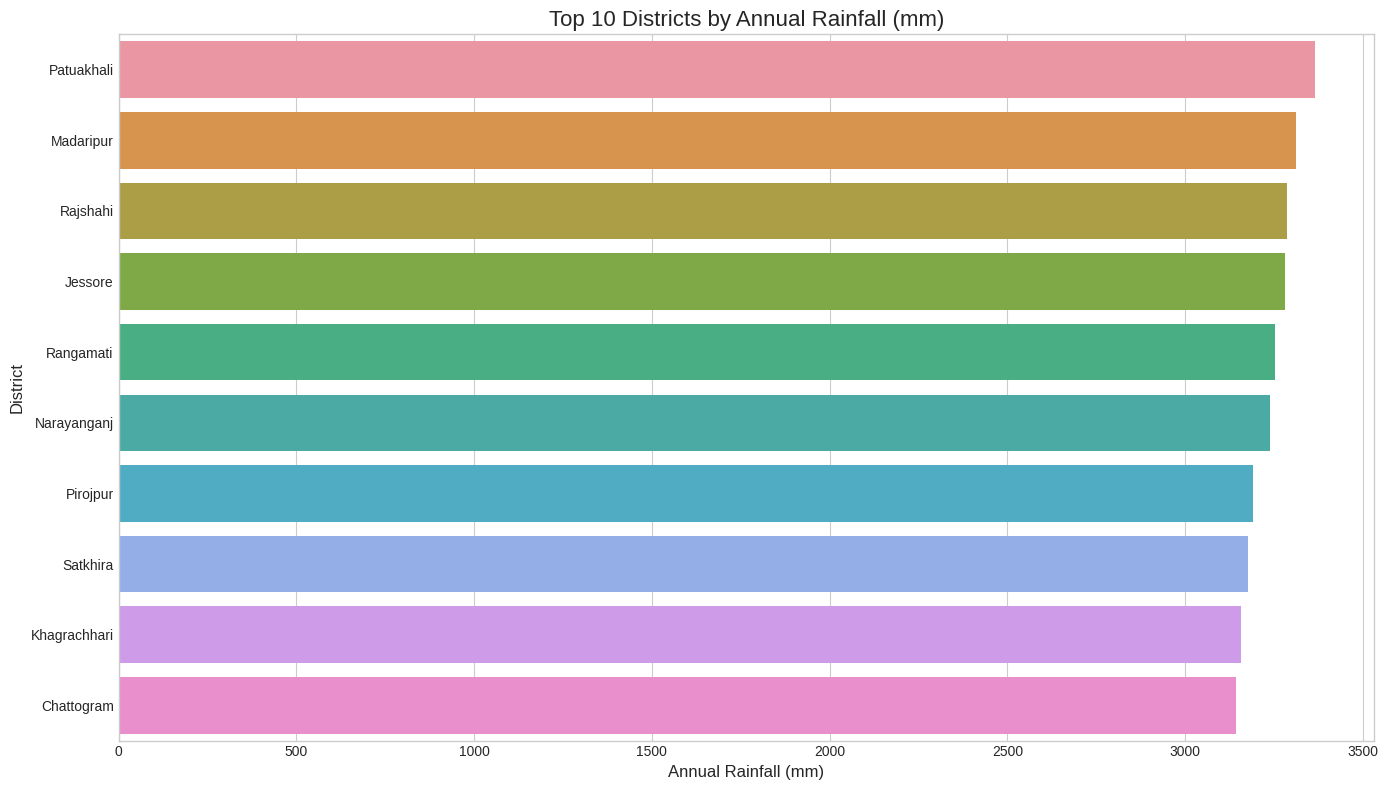

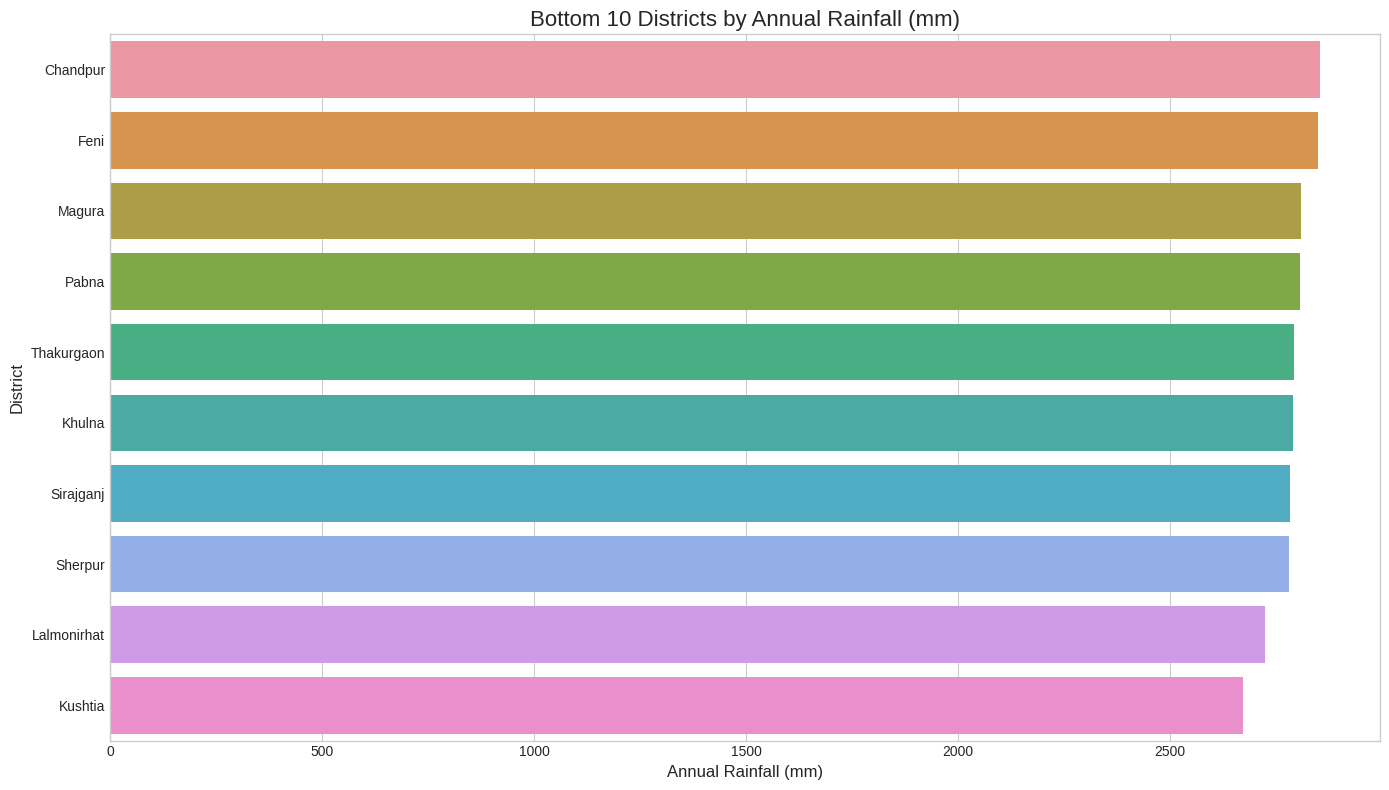

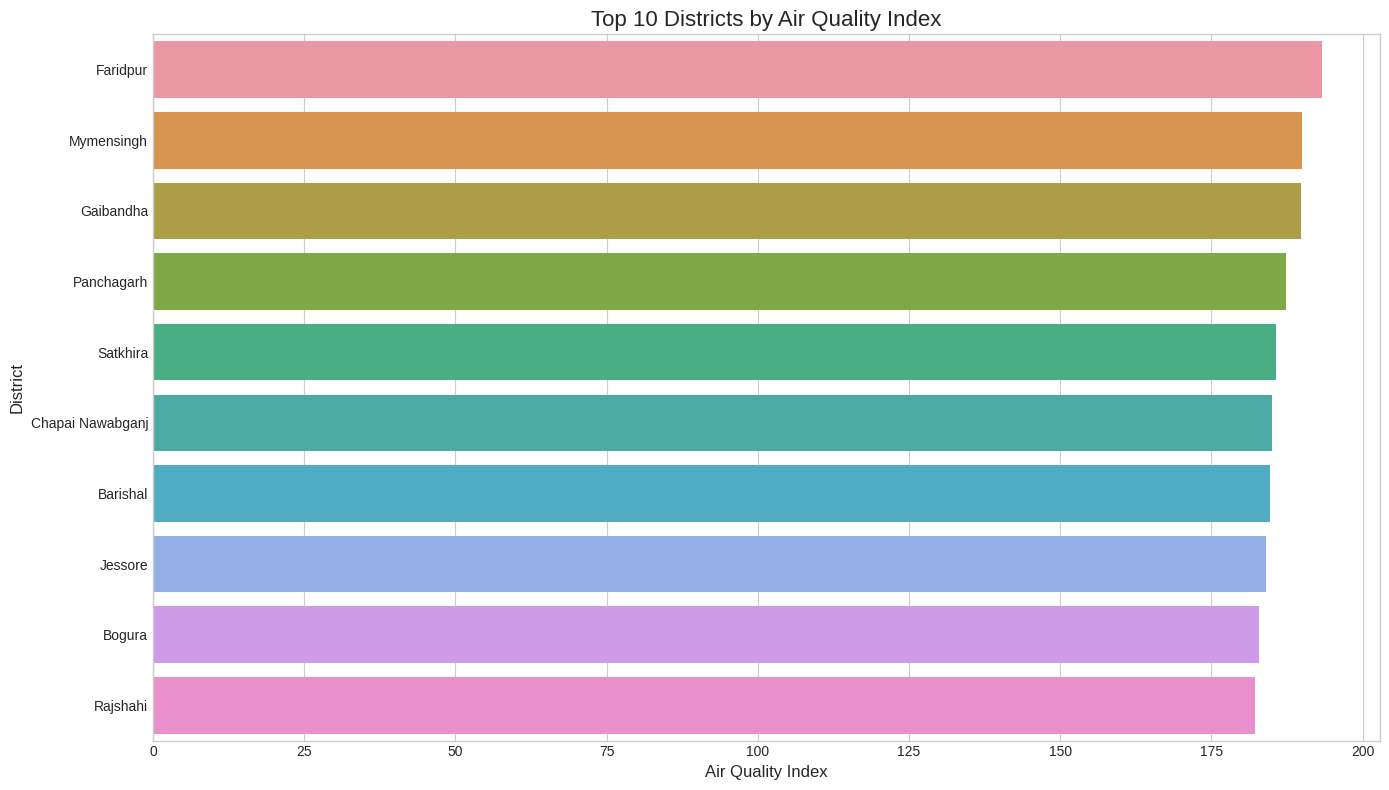

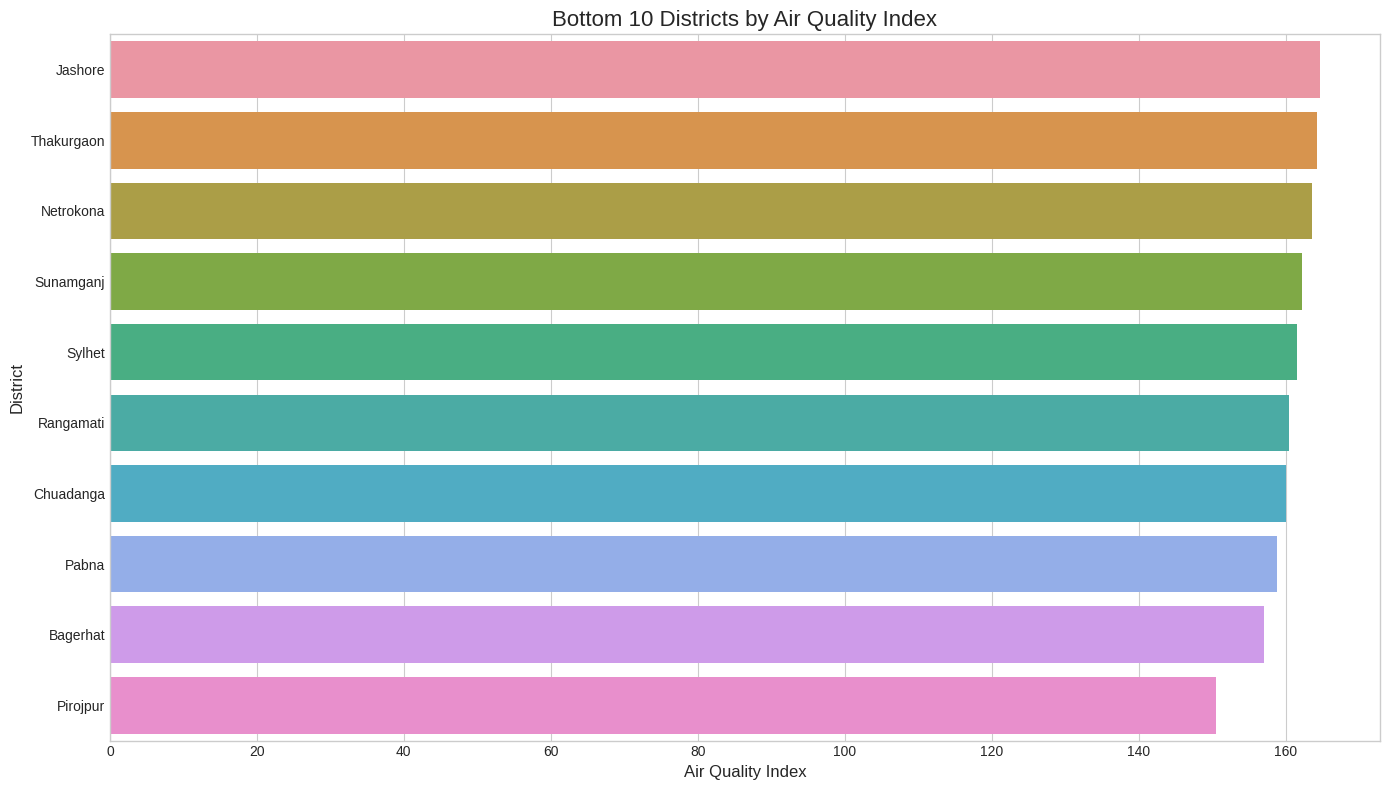

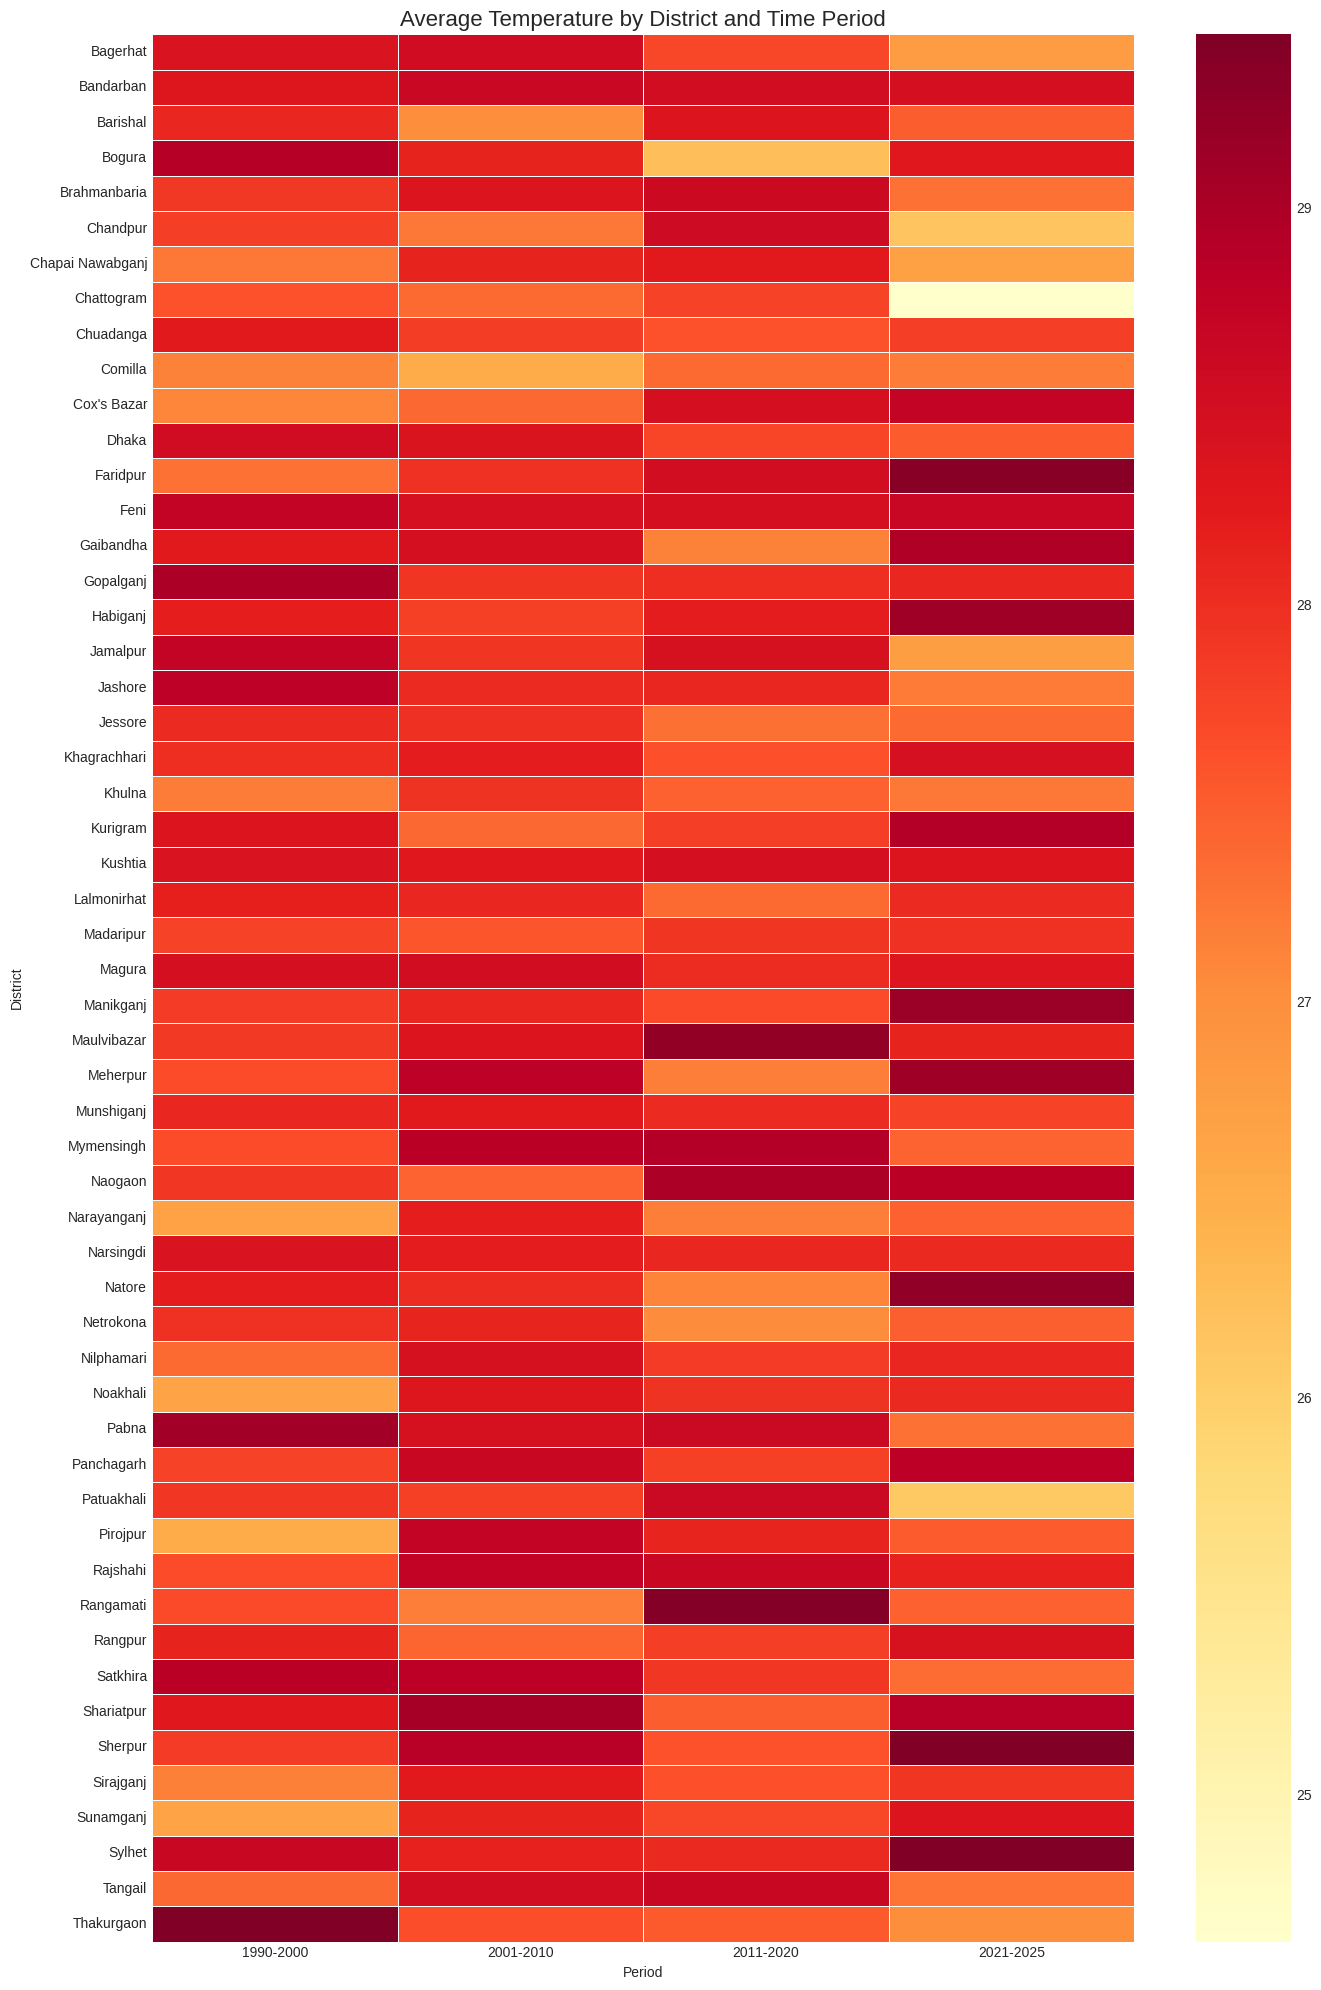

In [5]:
# Analyze district-wise climate patterns
def district_analysis(df, column, title, top_n=10):
    district_avg = df.groupby('District')[column].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(14, 8))
    
    # Plot top districts
    sns.barplot(x=district_avg.head(top_n).values, y=district_avg.head(top_n).index)
    plt.title(f'Top {top_n} Districts by {title}', fontsize=16)
    plt.xlabel(title, fontsize=12)
    plt.ylabel('District', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Plot bottom districts
    plt.figure(figsize=(14, 8))
    sns.barplot(x=district_avg.tail(top_n).values, y=district_avg.tail(top_n).index)
    plt.title(f'Bottom {top_n} Districts by {title}', fontsize=16)
    plt.xlabel(title, fontsize=12)
    plt.ylabel('District', fontsize=12)
    plt.tight_layout()
    plt.show()

# Analyze temperature by district
district_analysis(df, 'Avg_Temperature_C', 'Average Temperature (°C)')

# Analyze rainfall by district
district_analysis(df, 'Annual_Rainfall_mm', 'Annual Rainfall (mm)')

# Analyze AQI by district
district_analysis(df, 'AQI', 'Air Quality Index')

# Create a heatmap to visualize climate variables by district and period
# First, calculate the average values for each district and period
heatmap_data = df.pivot_table(
    index='District', 
    columns='Period',
    values=['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 'Forest_Cover_Percent']
)

# Plot heatmap for temperature
plt.figure(figsize=(14, 20))
sns.heatmap(heatmap_data['Avg_Temperature_C'], cmap='YlOrRd', annot=False, 
            linewidths=0.5, fmt='.2f')
plt.title('Average Temperature by District and Time Period', fontsize=16)
plt.tight_layout()
plt.show()


## Exploratory Data Analysis: Correlation Analysis

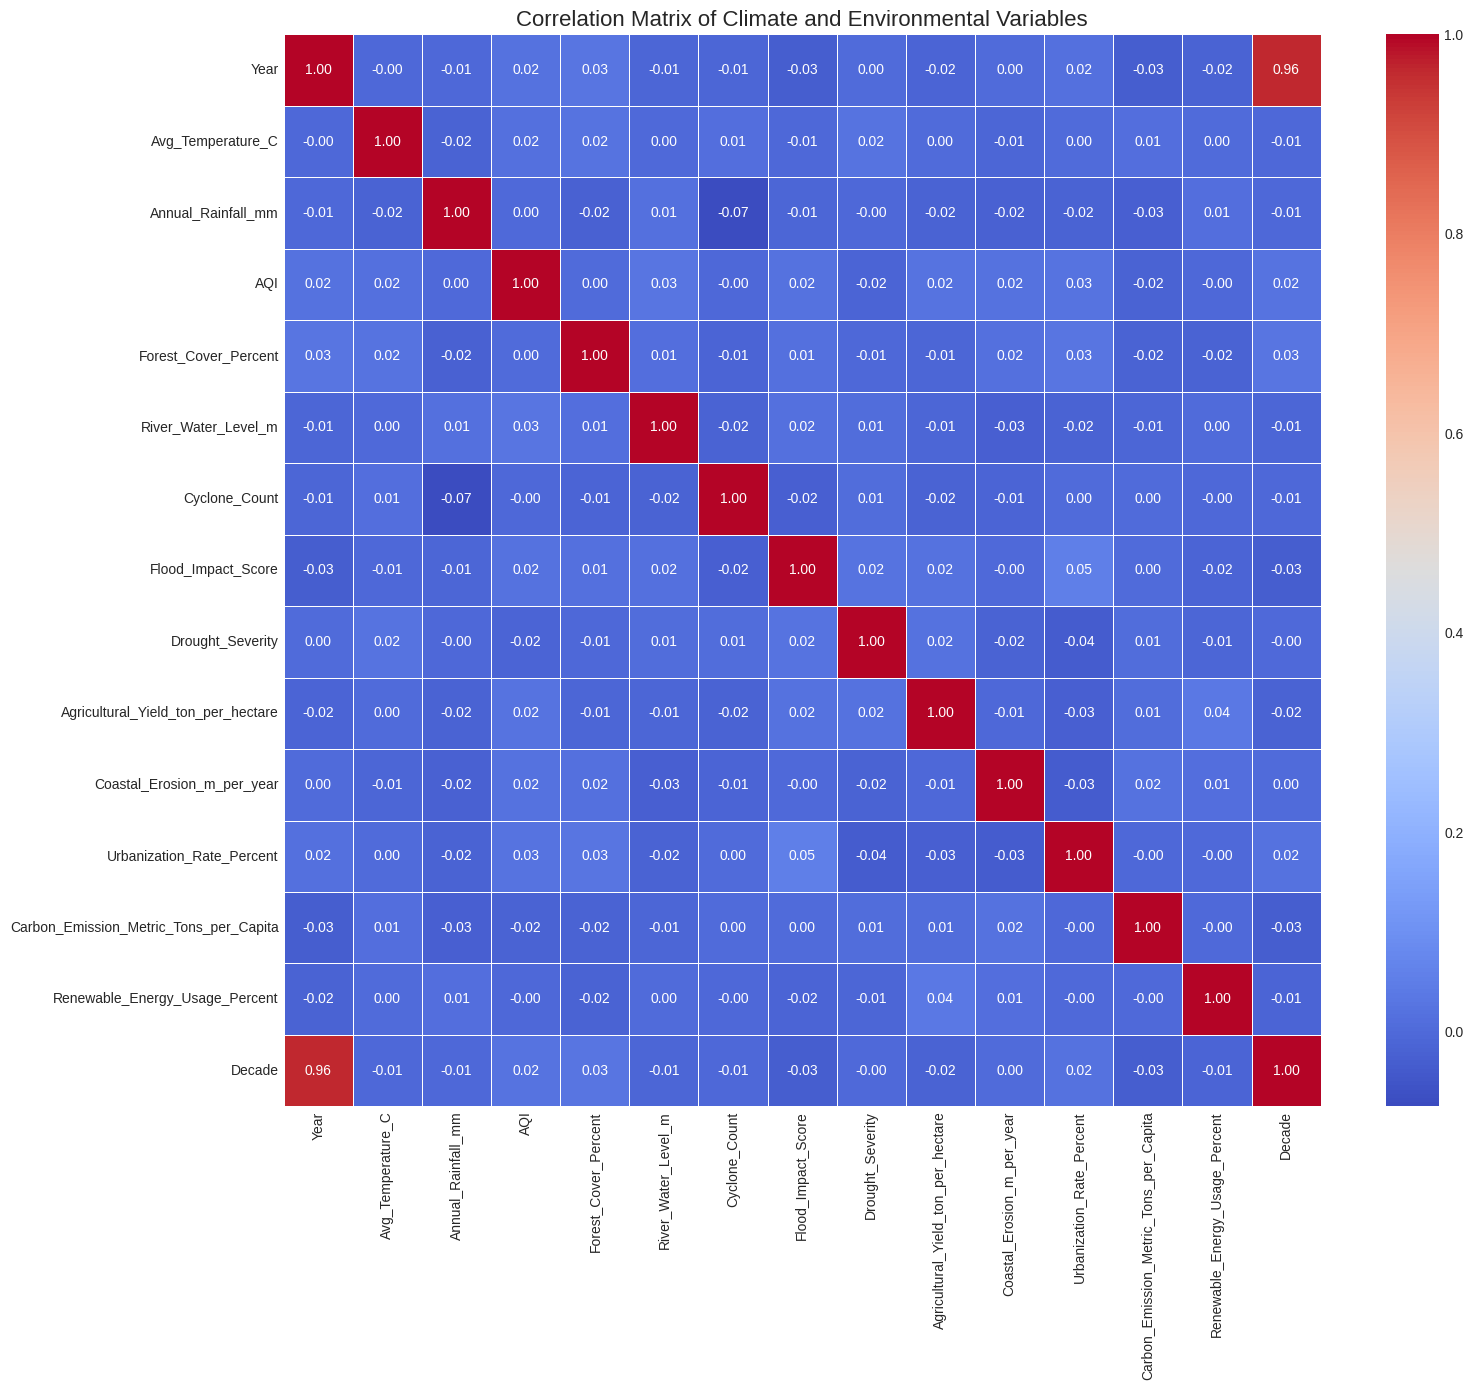

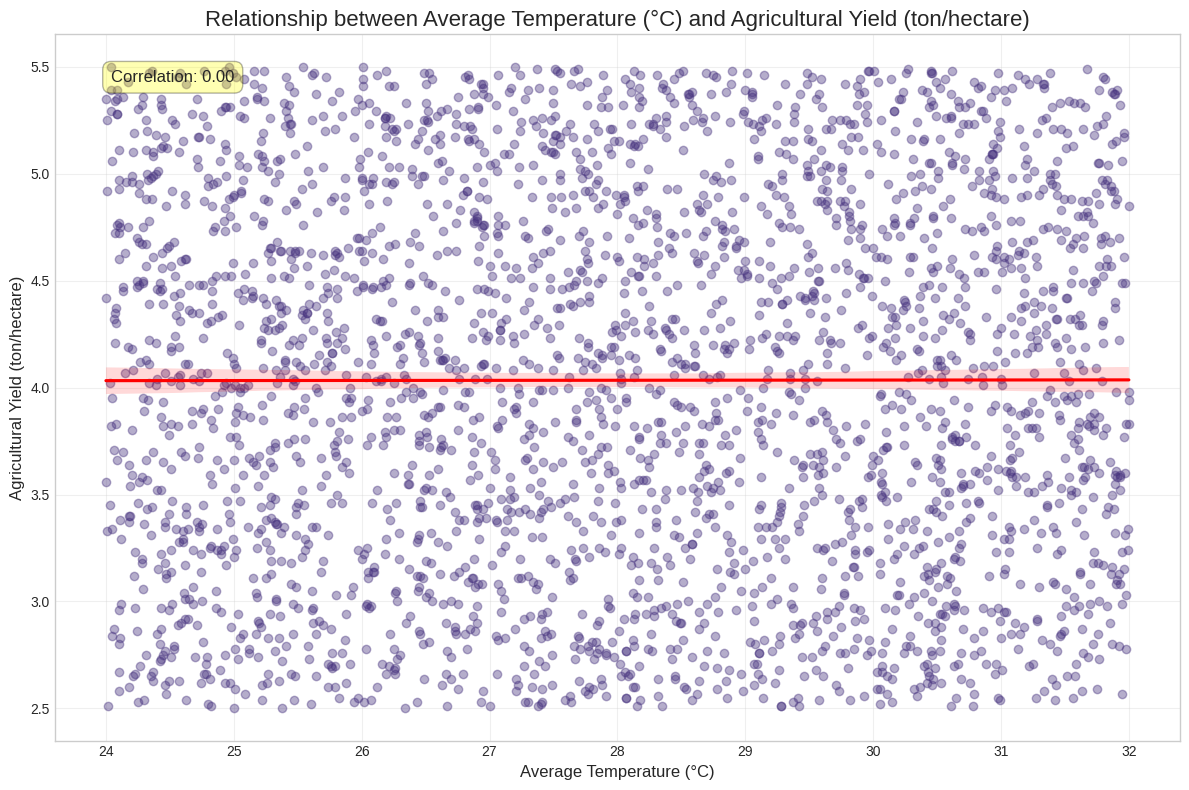

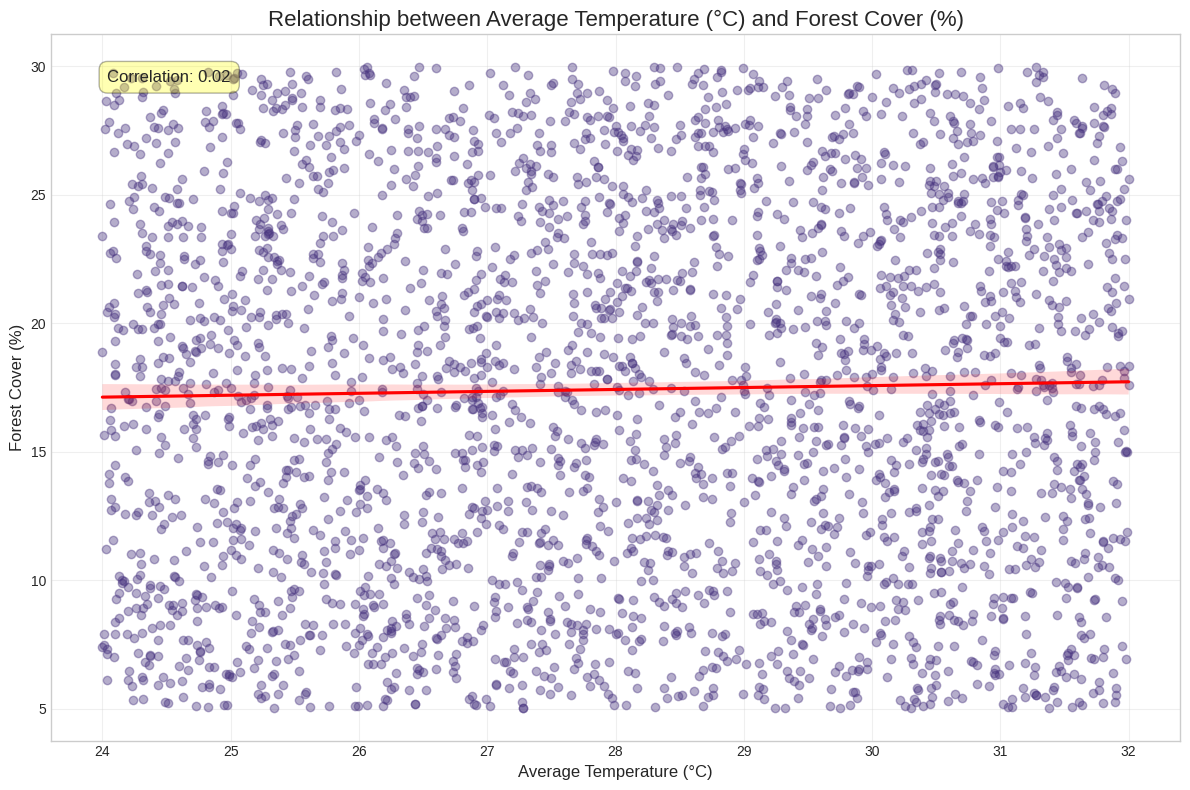

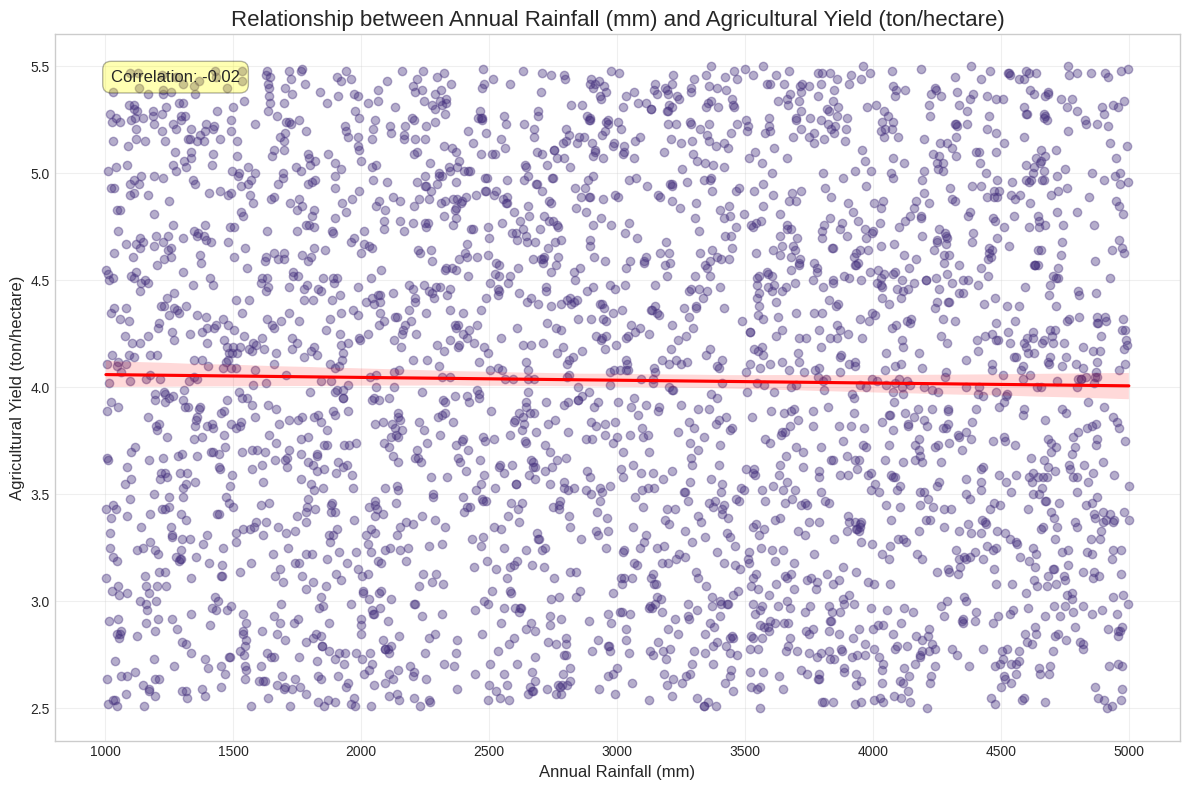

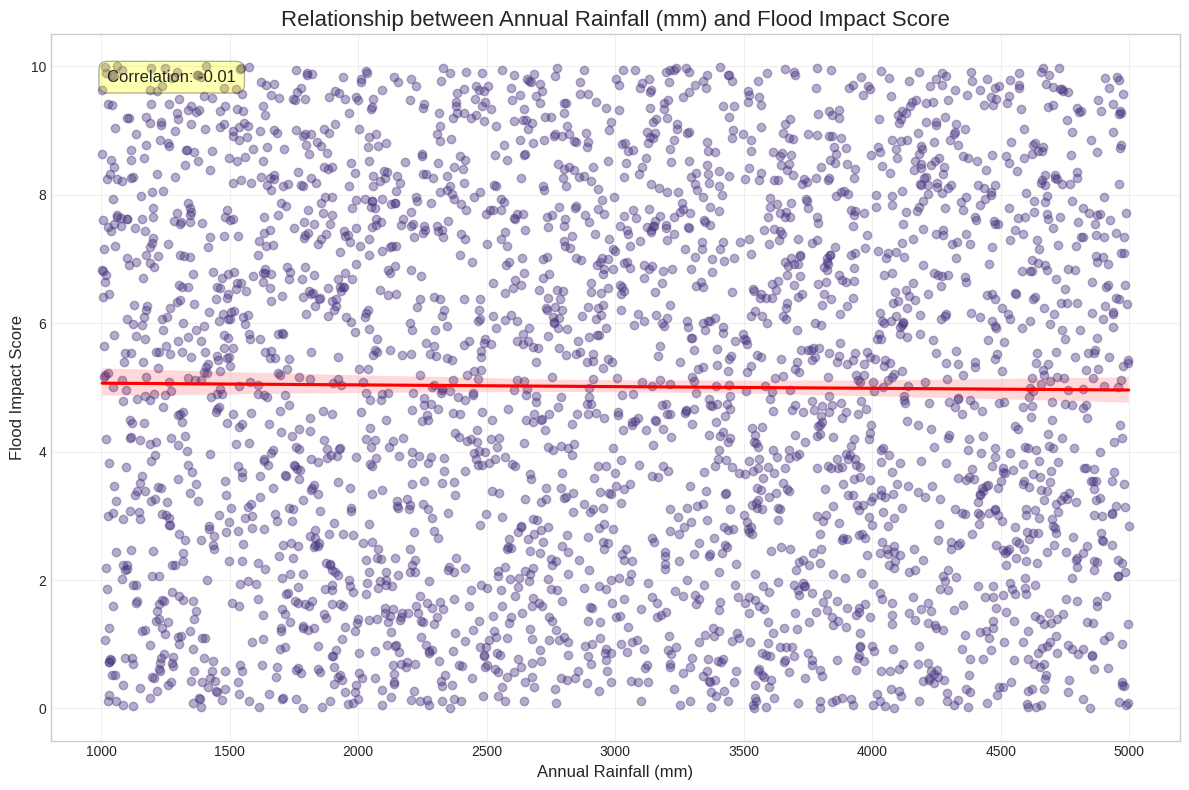

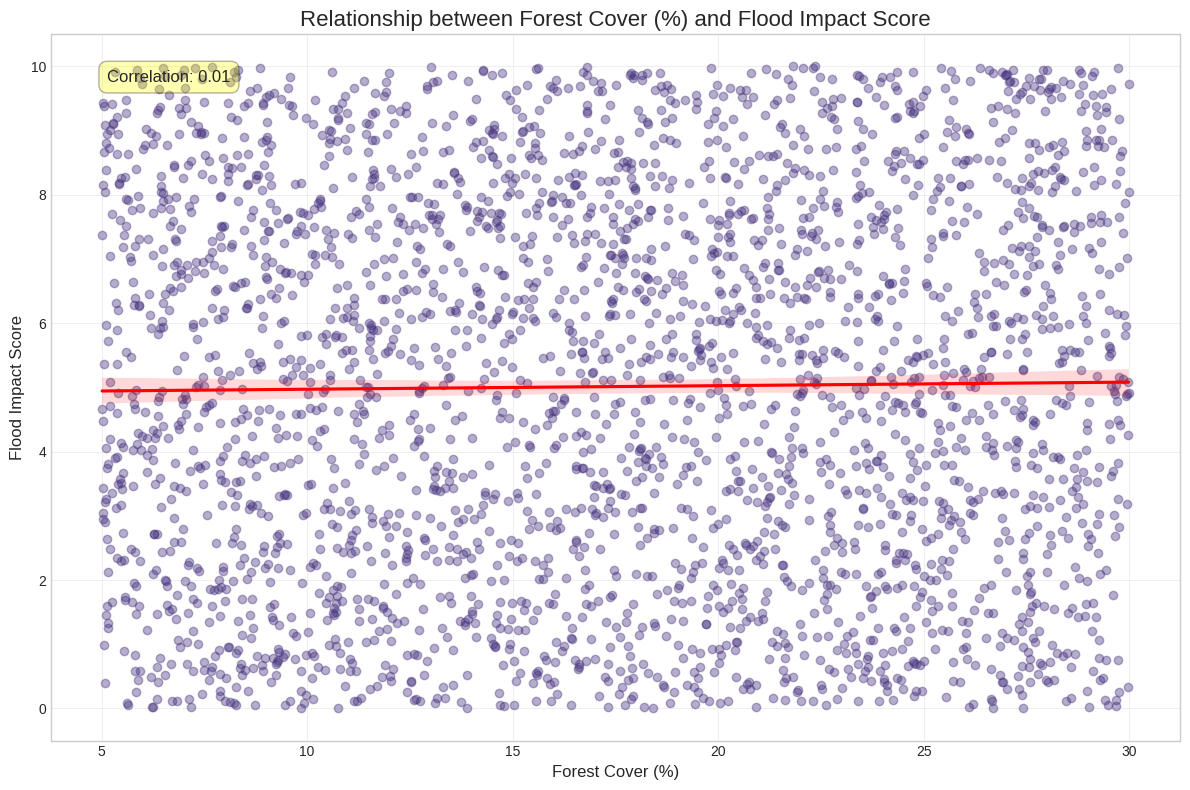

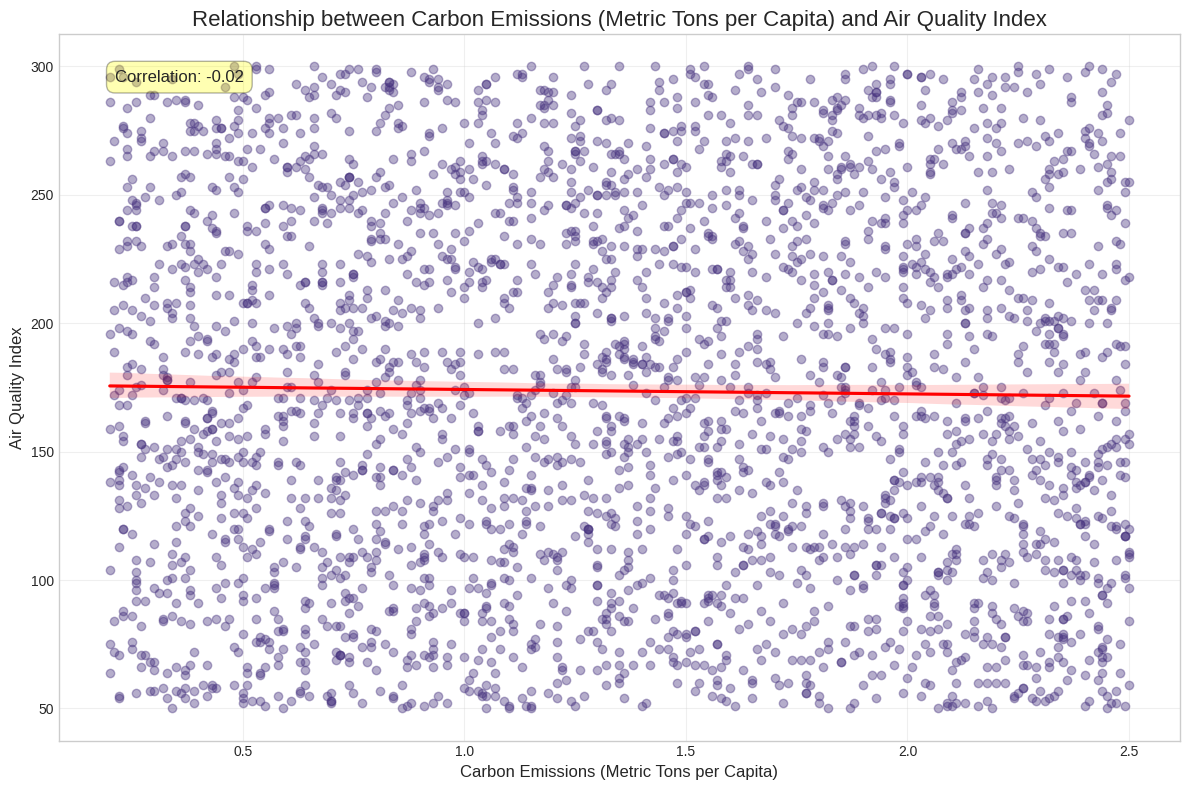

In [6]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Climate and Environmental Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Analyze relationships between key variables
def scatter_analysis(df, x_var, y_var, x_label, y_label):
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot with regression line
    sns.regplot(x=x_var, y=y_var, data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    
    # Calculate and display correlation coefficient
    corr = df[x_var].corr(df[y_var])
    plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                fontsize=12, ha='left', va='top',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))
    
    plt.title(f'Relationship between {x_label} and {y_label}', fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyze relationships between temperature and other variables
scatter_analysis(df, 'Avg_Temperature_C', 'Agricultural_Yield_ton_per_hectare', 
                'Average Temperature (°C)', 'Agricultural Yield (ton/hectare)')

scatter_analysis(df, 'Avg_Temperature_C', 'Forest_Cover_Percent', 
                'Average Temperature (°C)', 'Forest Cover (%)')

scatter_analysis(df, 'Annual_Rainfall_mm', 'Agricultural_Yield_ton_per_hectare', 
                'Annual Rainfall (mm)', 'Agricultural Yield (ton/hectare)')

scatter_analysis(df, 'Annual_Rainfall_mm', 'Flood_Impact_Score', 
                'Annual Rainfall (mm)', 'Flood Impact Score')

scatter_analysis(df, 'Forest_Cover_Percent', 'Flood_Impact_Score', 
                'Forest Cover (%)', 'Flood Impact Score')

scatter_analysis(df, 'Carbon_Emission_Metric_Tons_per_Capita', 'AQI', 
                'Carbon Emissions (Metric Tons per Capita)', 'Air Quality Index')


## Advanced Analysis: Climate Change Impact Assessment

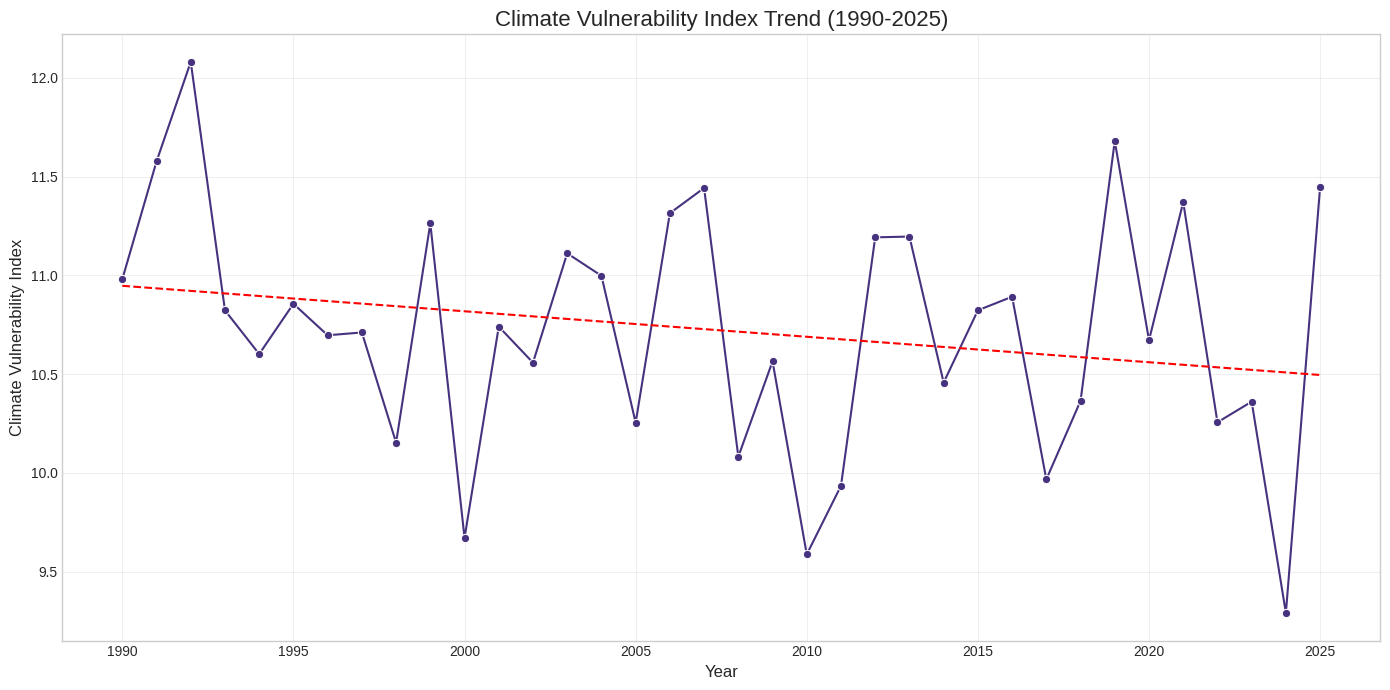

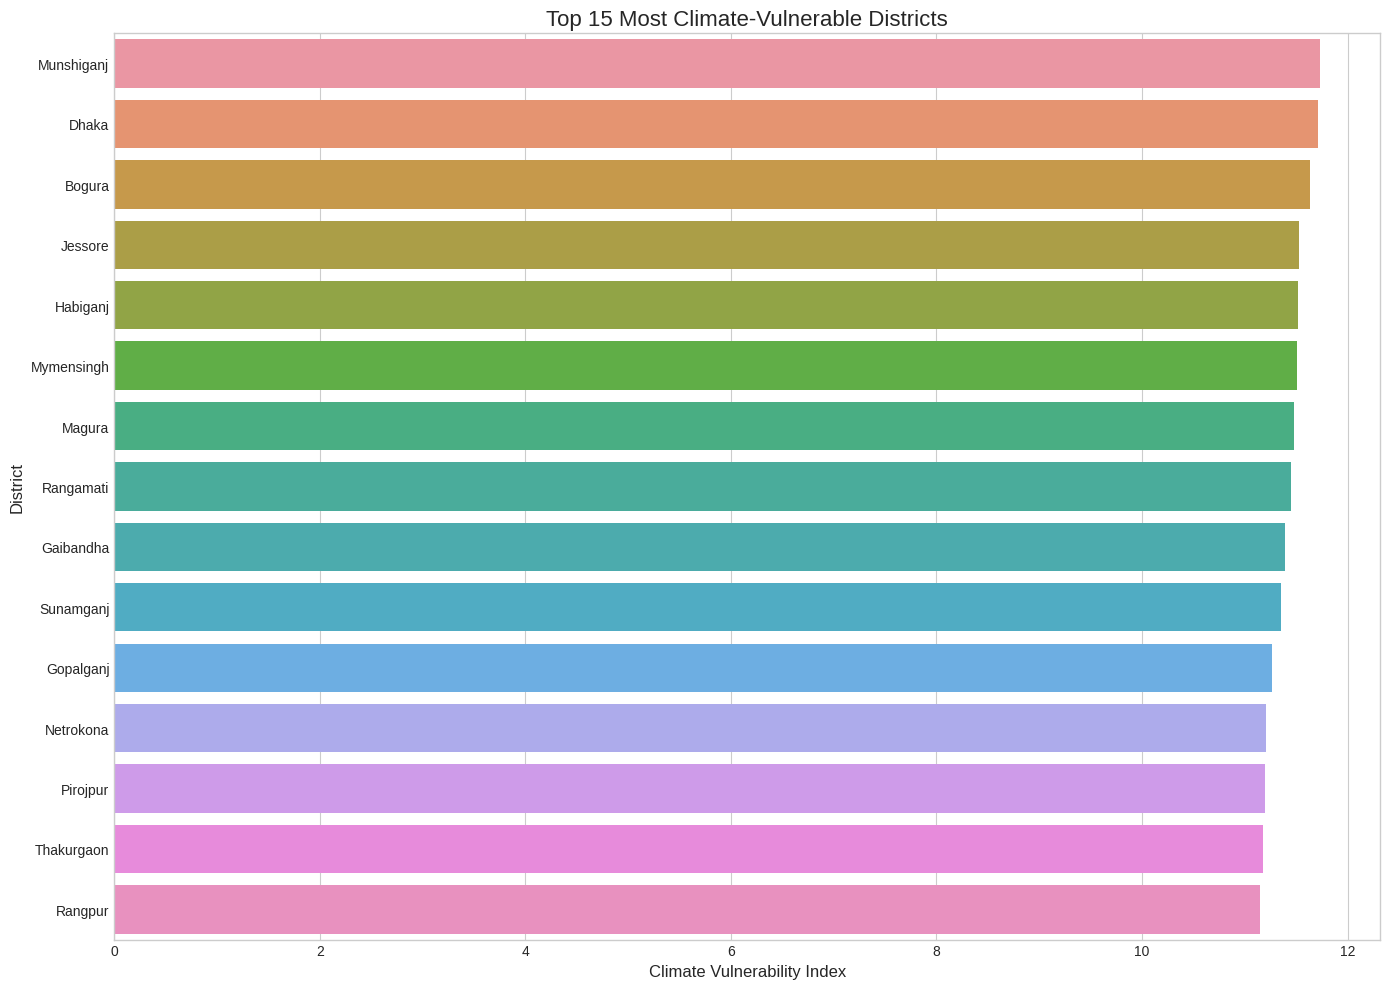

In [7]:
# Create a composite climate vulnerability index
df['Climate_Vulnerability_Index'] = (
    df['Flood_Impact_Score'] + 
    df['Drought_Severity'] + 
    df['Cyclone_Count'] - 
    df['Forest_Cover_Percent']/10
)

# Analyze vulnerability trends over time
plt.figure(figsize=(14, 7))
yearly_vulnerability = df.groupby('Year')['Climate_Vulnerability_Index'].mean().reset_index()
sns.lineplot(x='Year', y='Climate_Vulnerability_Index', data=yearly_vulnerability, marker='o')

# Add trend line
z = np.polyfit(yearly_vulnerability['Year'], yearly_vulnerability['Climate_Vulnerability_Index'], 1)
p = np.poly1d(z)
plt.plot(yearly_vulnerability['Year'], p(yearly_vulnerability['Year']), "r--")

plt.title('Climate Vulnerability Index Trend (1990-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Vulnerability Index', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze district-level vulnerability
district_vulnerability = df.groupby('District')['Climate_Vulnerability_Index'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x=district_vulnerability.head(15).values, y=district_vulnerability.head(15).index)
plt.title('Top 15 Most Climate-Vulnerable Districts', fontsize=16)
plt.xlabel('Climate Vulnerability Index', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.tight_layout()
plt.show()


## Machine Learning Models: Clustering Analysis

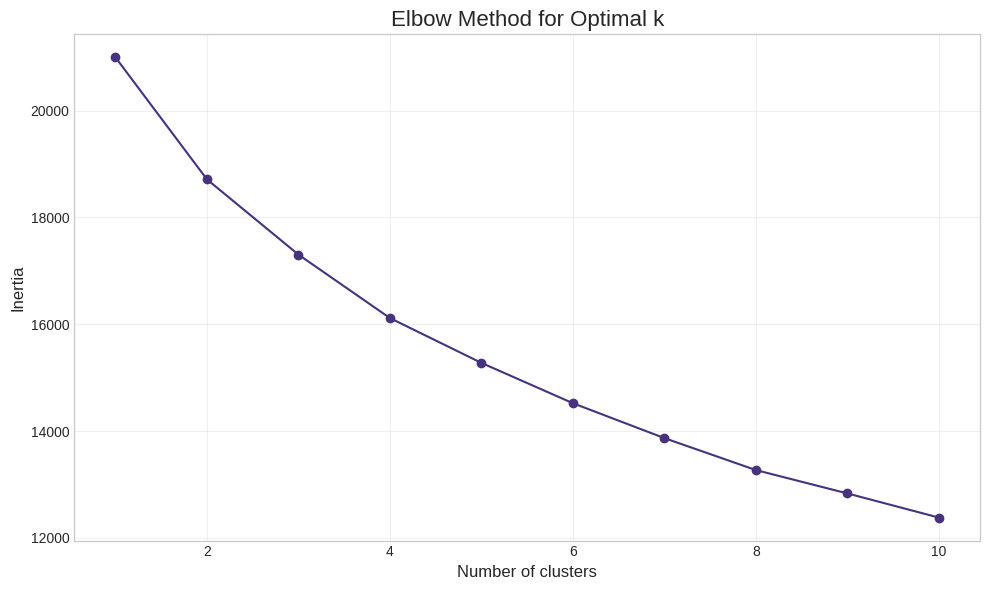

Cluster Characteristics:


Avg_Temperature_C  Annual_Rainfall_mm         AQI  \
Cluster                                                      
0                27.712099         3958.258534  169.608091   
1                27.855631         2388.946404  176.290366   
2                28.520028         1971.023796  172.390935   
3                28.001984         3526.848433  176.272846   

         Forest_Cover_Percent  Agricultural_Yield_ton_per_hectare  \
Cluster                                                             
0                   14.140923                            3.340278   
1                   10.668833                            4.634478   
2                   21.912054                            3.430170   
3                   23.183172                            4.728838   

         Flood_Impact_Score  Drought_Severity  
Cluster                                        
0                  4.610025          4.587244  
1                  5.294803          5.440692  
2                  4.656643          5.169207  
3                  5.488551          4.753081

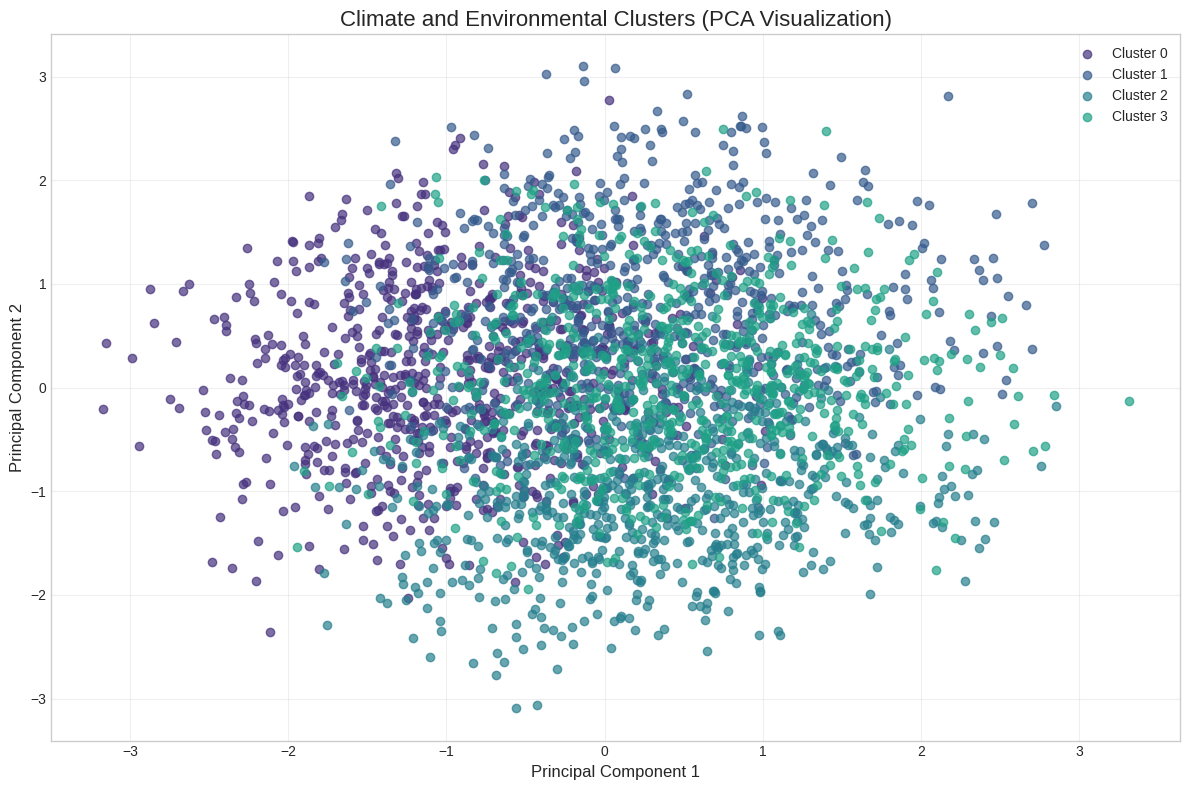

<Figure size 1200x800 with 0 Axes>

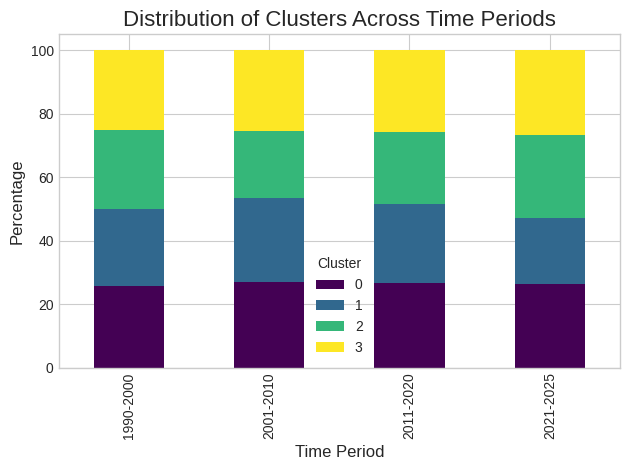

In [8]:
# Select features for clustering
cluster_features = ['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 
                   'Forest_Cover_Percent', 'Agricultural_Yield_ton_per_hectare',
                   'Flood_Impact_Score', 'Drought_Severity']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

# Determine optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply K-means clustering with the optimal number of clusters (let's use 4 as an example)
optimal_k = 4  # Based on elbow method visualization
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
print("Cluster Characteristics:")
display(cluster_analysis)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Climate and Environmental Clusters (PCA Visualization)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze how clusters are distributed across time periods
cluster_time_dist = pd.crosstab(df['Period'], df['Cluster'])
cluster_time_dist_percentage = cluster_time_dist.div(cluster_time_dist.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
cluster_time_dist_percentage.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Clusters Across Time Periods', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


## Machine Learning Models: Predictive Modeling

Random Forest Model Performance:
Mean Squared Error: 0.8552
R² Score: -0.0757


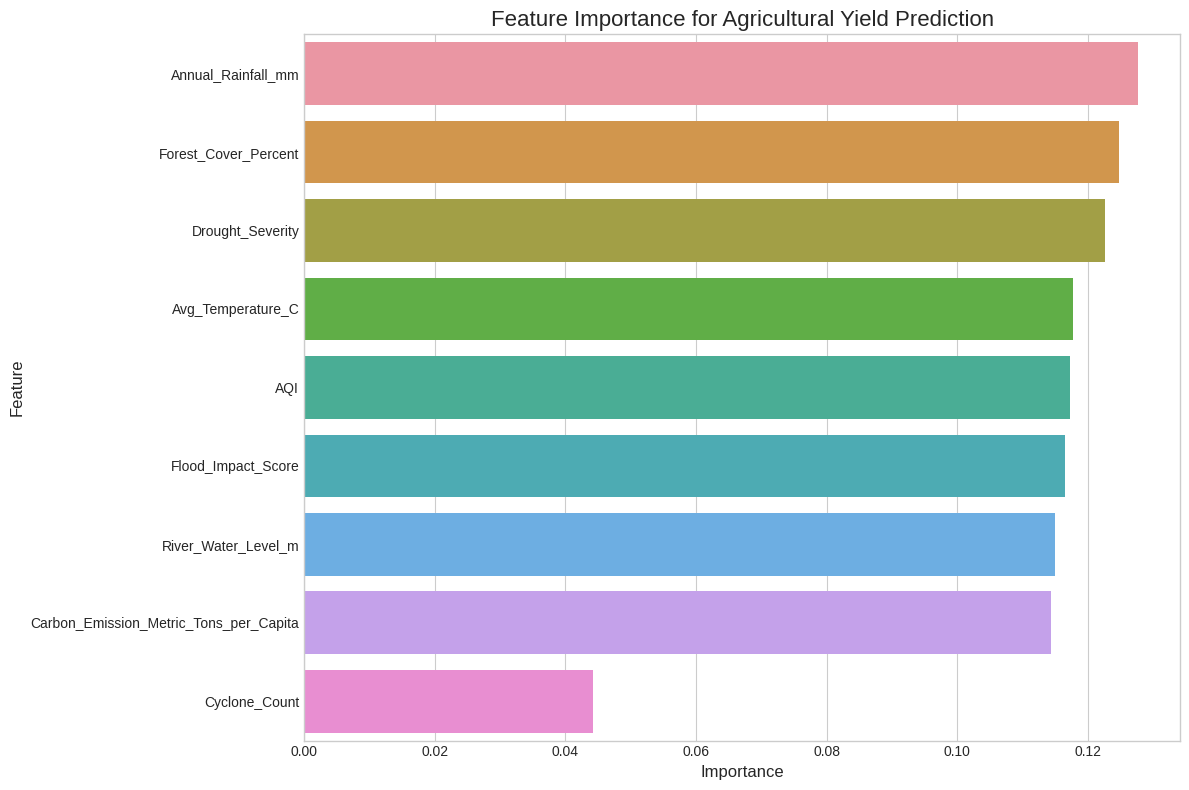

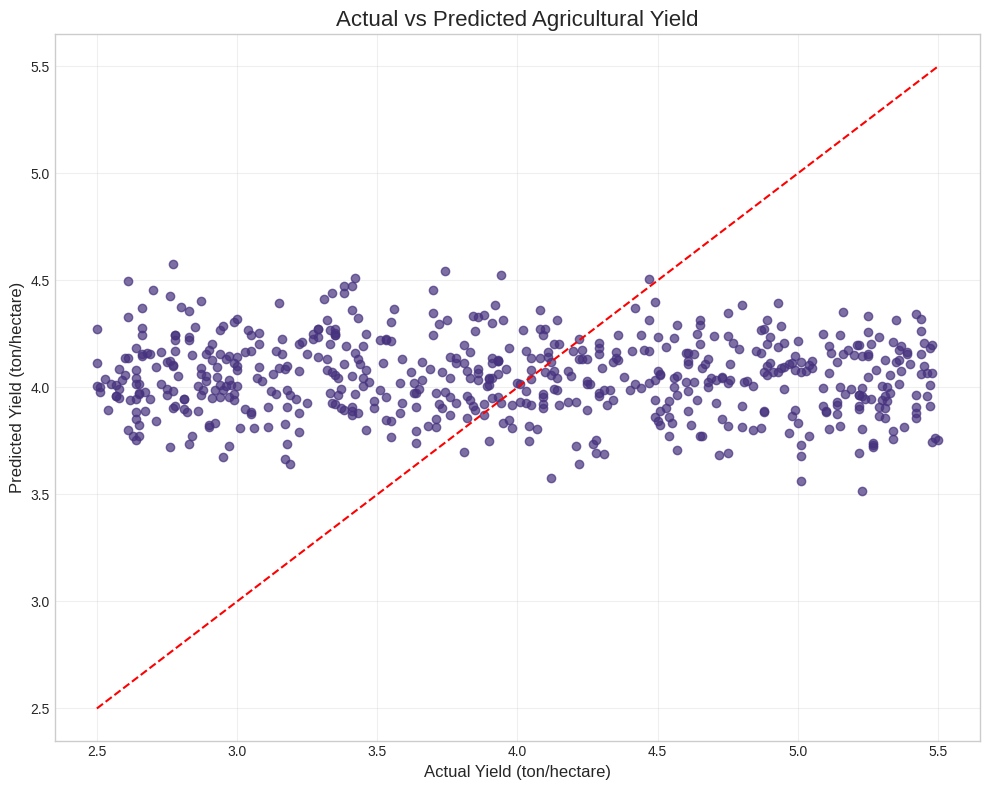

In [9]:
# Predict agricultural yield based on climate variables
# Select features and target
X = df[['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 'Forest_Cover_Percent', 
        'Flood_Impact_Score', 'Drought_Severity', 'River_Water_Level_m', 
        'Cyclone_Count', 'Carbon_Emission_Metric_Tons_per_Capita']]
y = df['Agricultural_Yield_ton_per_hectare']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Agricultural Yield Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Agricultural Yield', fontsize=16)
plt.xlabel('Actual Yield (ton/hectare)', fontsize=12)
plt.ylabel('Predicted Yield (ton/hectare)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Machine Learning Models: Time Series Forecasting

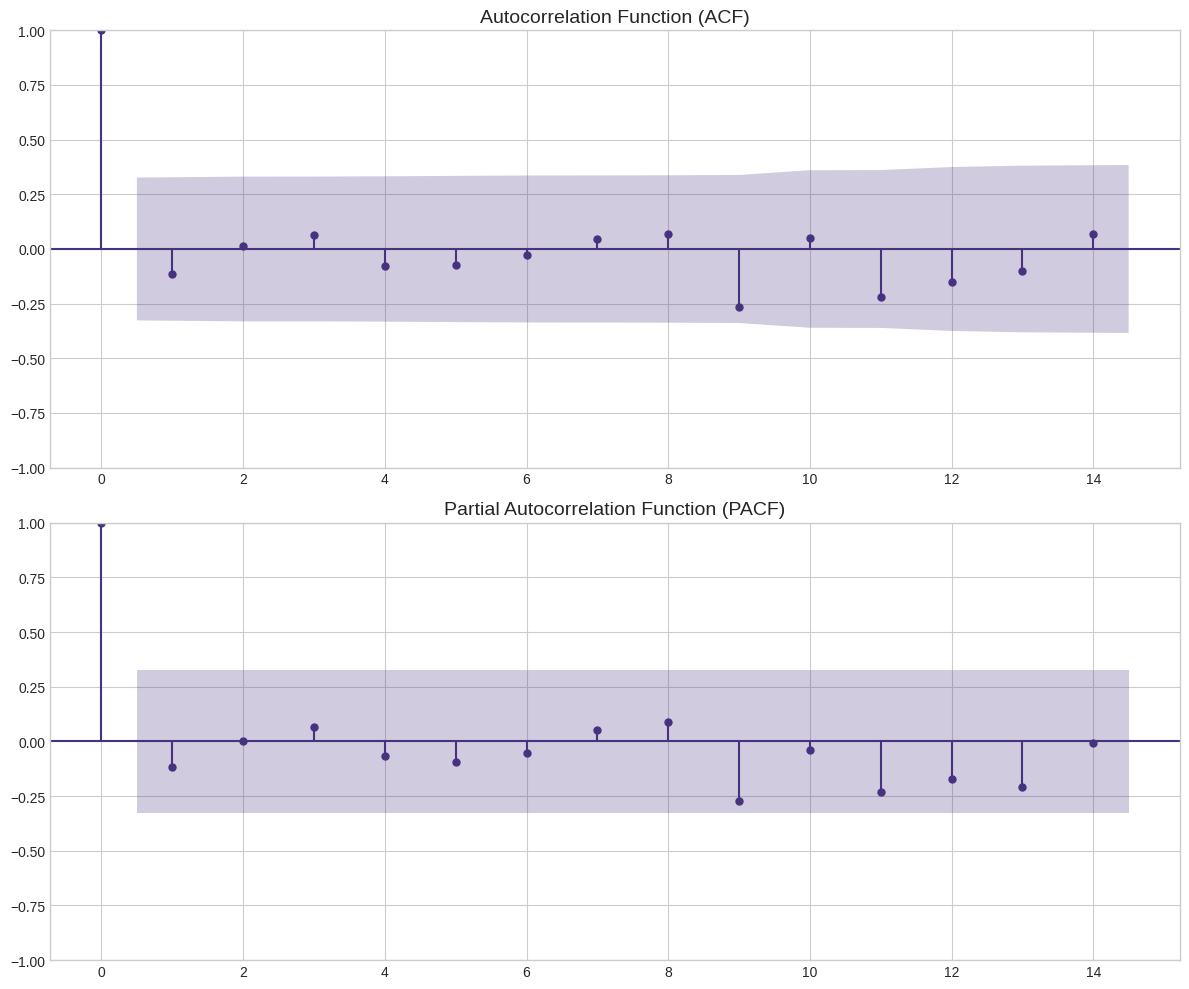

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

                               SARIMAX Results                                
Dep. Variable:      Avg_Temperature_C   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   3.906
Date:                Wed, 12 Mar 2025   AIC                             -1.812
Time:                        18:07:12   BIC                              2.854
Sample:                             0   HQIC                            -0.201
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0879      0.204     -0.431      0.666      -0.488       0.312
ma.L1         -0.9984      3.944     -0.253      0.800      -8.729       6.732
sigma2         0.0422      0.165      0.256      0.7

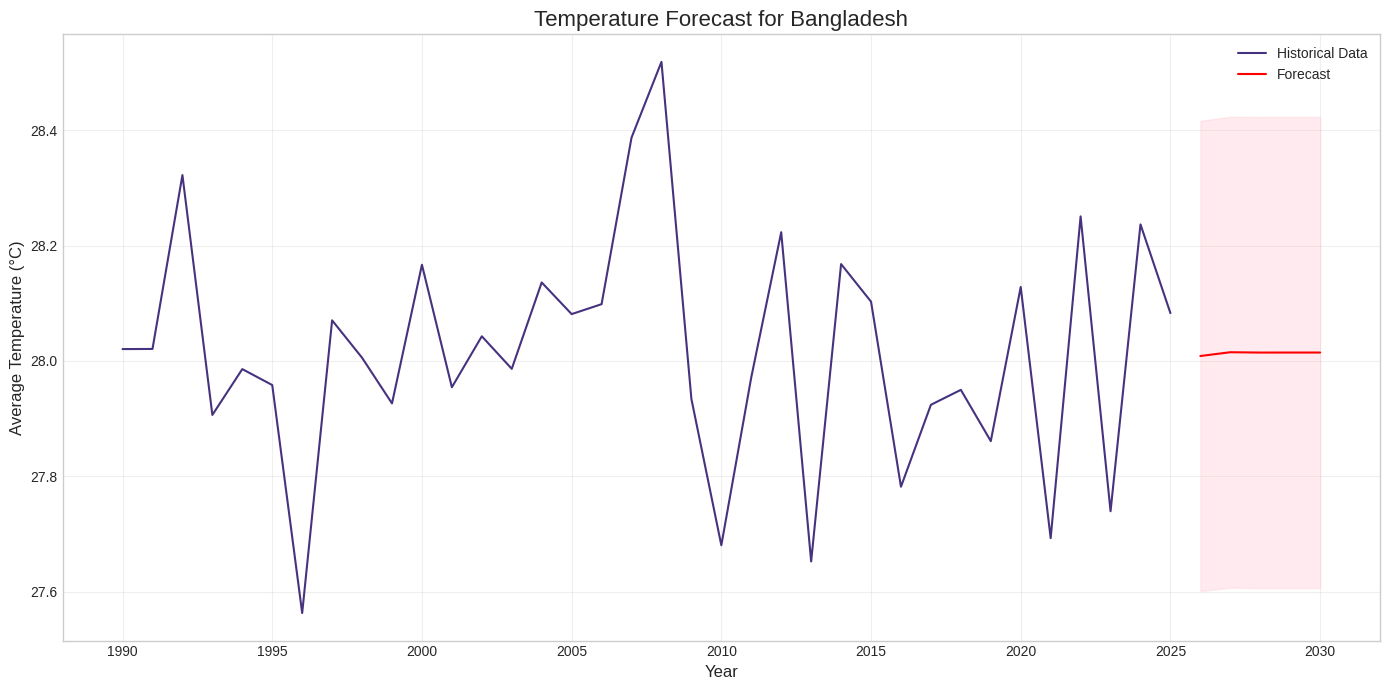

In [10]:
# Create a time series forecast for temperature
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare time series data
yearly_temp = df.groupby('Year')['Avg_Temperature_C'].mean()

# Calculate maximum lags (must be less than 50% of sample size)
max_lags = int(len(yearly_temp) * 0.4)  # Using 40% of sample size to be safe

# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 10))
plt.subplot(211)
plot_acf(yearly_temp, ax=plt.gca(), lags=max_lags)
plt.title('Autocorrelation Function (ACF)', fontsize=14)

plt.subplot(212)
plot_pacf(yearly_temp, ax=plt.gca(), lags=max_lags)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=14)
plt.tight_layout()
plt.show()

# Fit ARIMA model (parameters to be adjusted based on ACF/PACF)
model = ARIMA(yearly_temp, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast future temperatures
forecast_steps = 5  # Forecasting 5 years into the future
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()
forecast_index = range(yearly_temp.index[-1] + 1, yearly_temp.index[-1] + forecast_steps + 1)

# Plot historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(yearly_temp.index, yearly_temp, label='Historical Data')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0],  # Lower CI
                 forecast_ci.iloc[:, 1],  # Upper CI
                 color='pink', alpha=0.3)
plt.title('Temperature Forecast for Bangladesh', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Machine Learning Models : Climate Change Impact Analysis

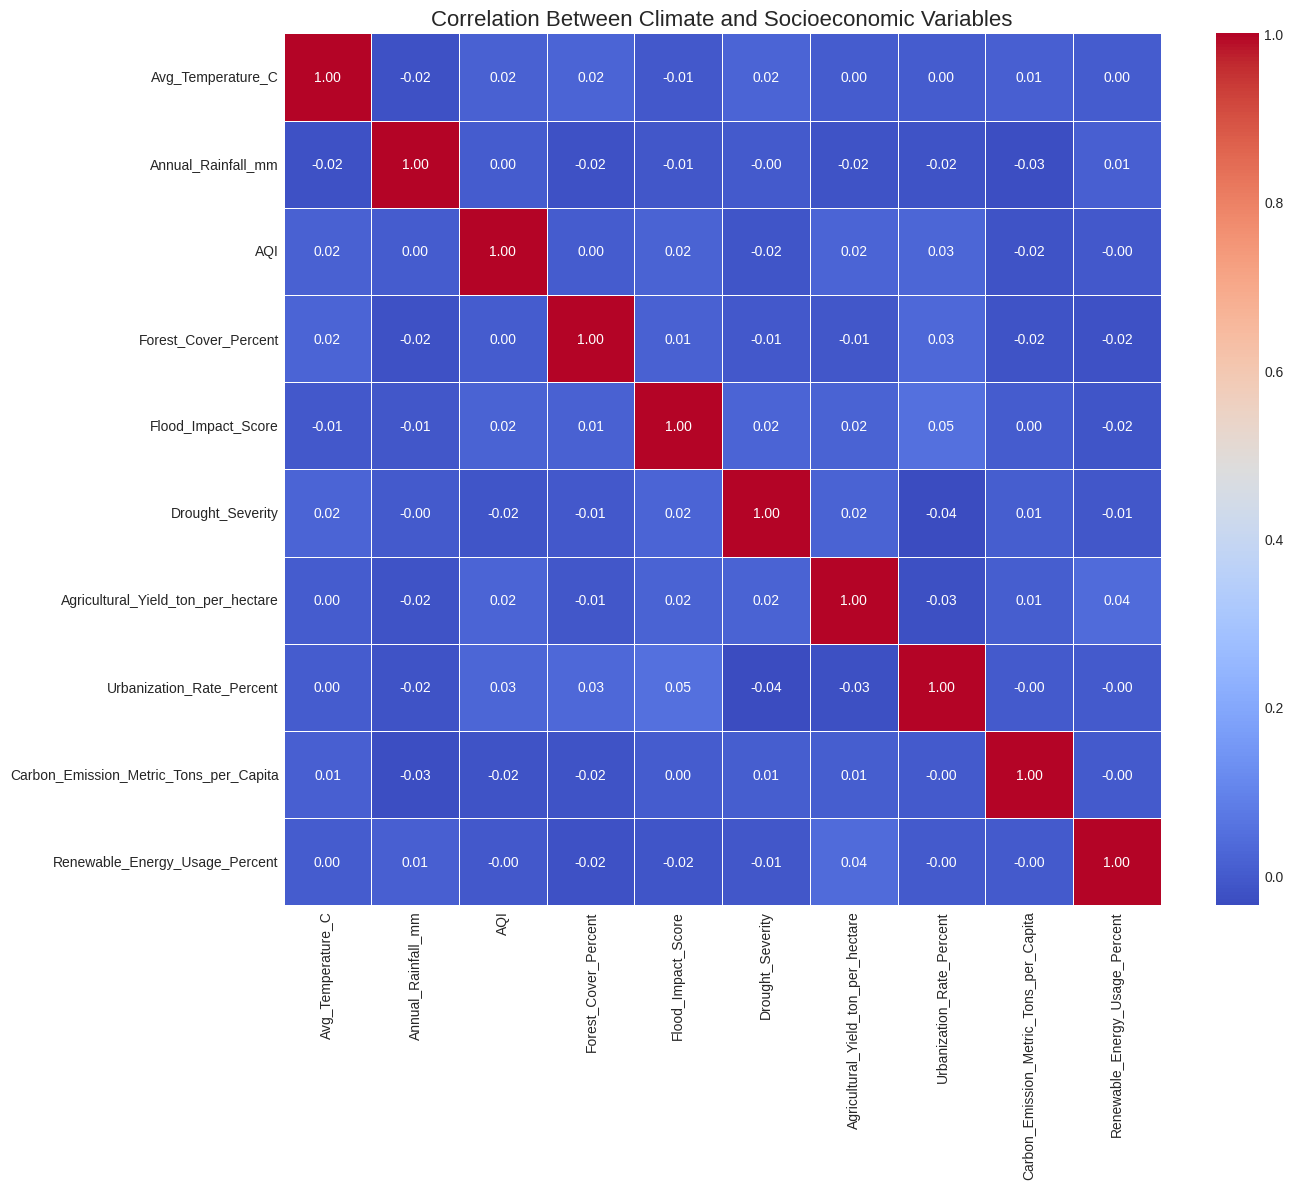

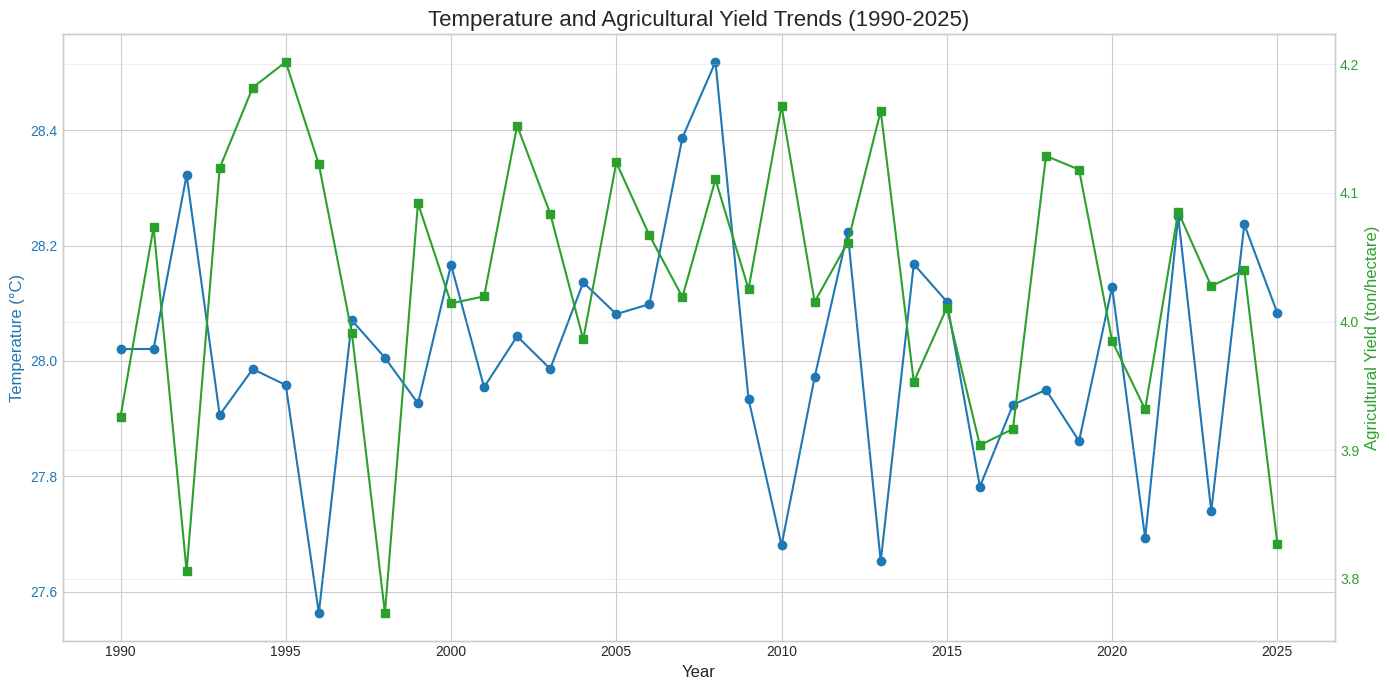

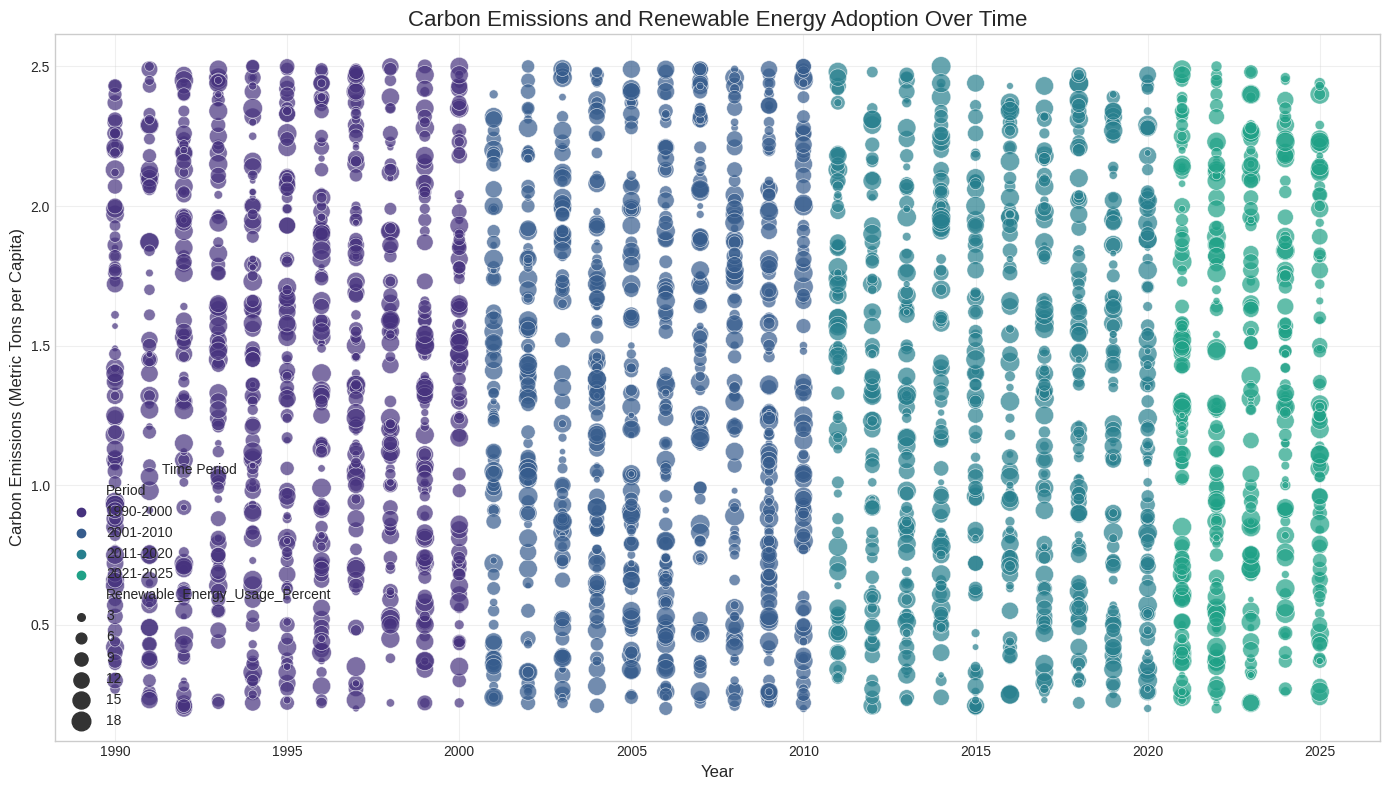

In [11]:
# Analyze the relationship between climate change and socioeconomic factors
# Create a correlation matrix for climate and socioeconomic variables
socioeconomic_vars = ['Agricultural_Yield_ton_per_hectare', 'Urbanization_Rate_Percent', 
                      'Carbon_Emission_Metric_Tons_per_Capita', 'Renewable_Energy_Usage_Percent']
climate_vars = ['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 'Forest_Cover_Percent', 
                'Flood_Impact_Score', 'Drought_Severity']

# Calculate correlation matrix
climate_socio_corr = df[climate_vars + socioeconomic_vars].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(climate_socio_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Climate and Socioeconomic Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Analyze impact of climate change on agricultural yield over time
# Group by year and calculate average values
yearly_data = df.groupby('Year')[['Avg_Temperature_C', 'Annual_Rainfall_mm', 
                                 'Agricultural_Yield_ton_per_hectare']].mean().reset_index()

# Create a multi-line plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(yearly_data['Year'], yearly_data['Avg_Temperature_C'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Agricultural Yield (ton/hectare)', color=color, fontsize=12)
ax2.plot(yearly_data['Year'], yearly_data['Agricultural_Yield_ton_per_hectare'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Temperature and Agricultural Yield Trends (1990-2025)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze the impact of environmental policies on carbon emissions and renewable energy
# Create a scatter plot with bubble size representing renewable energy usage
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Year', y='Carbon_Emission_Metric_Tons_per_Capita', 
                size='Renewable_Energy_Usage_Percent', hue='Period', 
                sizes=(20, 200), alpha=0.7)
plt.title('Carbon Emissions and Renewable Energy Adoption Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Carbon Emissions (Metric Tons per Capita)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Time Period')
plt.tight_layout()
plt.show()


## Conclusion and Recommendations

In [12]:
# Create a function to generate climate risk profiles for districts
def generate_district_risk_profile(df, district_name):
    # Filter data for the specified district
    district_data = df[df['District'] == district_name]
    
    # Calculate average values for recent years (2015-2025)
    recent_data = district_data[district_data['Year'] >= 2015]
    historical_data = district_data[district_data['Year'] < 2015]
    
    if recent_data.empty or historical_data.empty:
        print(f"Insufficient data for {district_name}")
        return
    
    # Select only numeric columns for mean calculation
    numeric_cols = ['Avg_Temperature_C', 'Annual_Rainfall_mm', 'AQI', 'Forest_Cover_Percent',
                   'Flood_Impact_Score', 'Drought_Severity', 'Climate_Vulnerability_Index']
    
    recent_avg = recent_data[numeric_cols].mean()
    historical_avg = historical_data[numeric_cols].mean()
    
    # Calculate percentage changes
    changes = {}
    for col in numeric_cols:
        if col != 'Climate_Vulnerability_Index':  # Skip this for percentage calculation
            if historical_avg[col] != 0:
                changes[col] = ((recent_avg[col] - historical_avg[col]) / historical_avg[col]) * 100
            else:
                changes[col] = 0  # Avoid division by zero
    
    # Print risk profile
    print(f"Climate Risk Profile for {district_name}")
    print("=" * 50)
    print(f"Average Temperature Change: {changes.get('Avg_Temperature_C', 0):.2f}%")
    print(f"Annual Rainfall Change: {changes.get('Annual_Rainfall_mm', 0):.2f}%")
    print(f"AQI Change: {changes.get('AQI', 0):.2f}%")
    print(f"Forest Cover Change: {changes.get('Forest_Cover_Percent', 0):.2f}%")
    print(f"Flood Impact Score Change: {changes.get('Flood_Impact_Score', 0):.2f}%")
    print(f"Drought Severity Change: {changes.get('Drought_Severity', 0):.2f}%")
    print("\nCurrent Climate Vulnerability Index:", recent_avg.get('Climate_Vulnerability_Index', 'N/A'))
    print("\nRecommended Adaptation Strategies:")
    
    # Generate recommendations based on risk factors
    if changes.get('Avg_Temperature_C', 0) > 5:
        print("- Implement heat-resistant crop varieties")
        print("- Develop urban cooling strategies")
    
    if changes.get('Annual_Rainfall_mm', 0) > 10 or changes.get('Flood_Impact_Score', 0) > 10:
        print("- Enhance flood protection infrastructure")
        print("- Implement improved drainage systems")
    
    if changes.get('Drought_Severity', 0) > 5:
        print("- Develop drought-resistant agriculture")
        print("- Implement water conservation measures")
    
    if changes.get('Forest_Cover_Percent', 0) < -5:
        print("- Accelerate reforestation efforts")
        print("- Implement stricter forest protection policies")
    
    if changes.get('AQI', 0) > 5:
        print("- Strengthen air quality regulations")
        print("- Promote clean energy adoption")

# Try to generate risk profiles for a few districts
# Make sure district_vulnerability is defined before this point
try:
    # If district_vulnerability is not defined, create a simple version
    if 'district_vulnerability' not in locals():
        district_vulnerability = df.groupby('District')['Climate_Vulnerability_Index'].mean().sort_values(ascending=False)
    
    high_risk_districts = district_vulnerability.head(5).index.tolist()
    for district in high_risk_districts:
        generate_district_risk_profile(df, district)
        print("\n")
except Exception as e:
    print(f"Error generating district profiles: {e}")
    # Fallback to using a few manually selected districts
    sample_districts = df['District'].unique()[:5]
    print(f"Using sample districts instead: {sample_districts}")
    for district in sample_districts:
        try:
            generate_district_risk_profile(df, district)
            print("\n")
        except Exception as e:
            print(f"Error with district {district}: {e}")


Climate Risk Profile for Munshiganj
Average Temperature Change: 0.12%
Annual Rainfall Change: 17.82%
AQI Change: -4.58%
Forest Cover Change: -9.42%
Flood Impact Score Change: -13.54%
Drought Severity Change: 17.21%

Current Climate Vulnerability Index: 11.930333333333333

Recommended Adaptation Strategies:
- Enhance flood protection infrastructure
- Implement improved drainage systems
- Develop drought-resistant agriculture
- Implement water conservation measures
- Accelerate reforestation efforts
- Implement stricter forest protection policies


Climate Risk Profile for Dhaka
Average Temperature Change: -5.02%
Annual Rainfall Change: -5.30%
AQI Change: 5.84%
Forest Cover Change: 19.98%
Flood Impact Score Change: 13.66%
Drought Severity Change: -8.24%

Current Climate Vulnerability Index: 11.740187500000001

Recommended Adaptation Strategies:
- Enhance flood protection infrastructure
- Implement improved drainage systems
- Strengthen air quality regulations
- Promote clean energy adopt

## Final Summary and Future Work

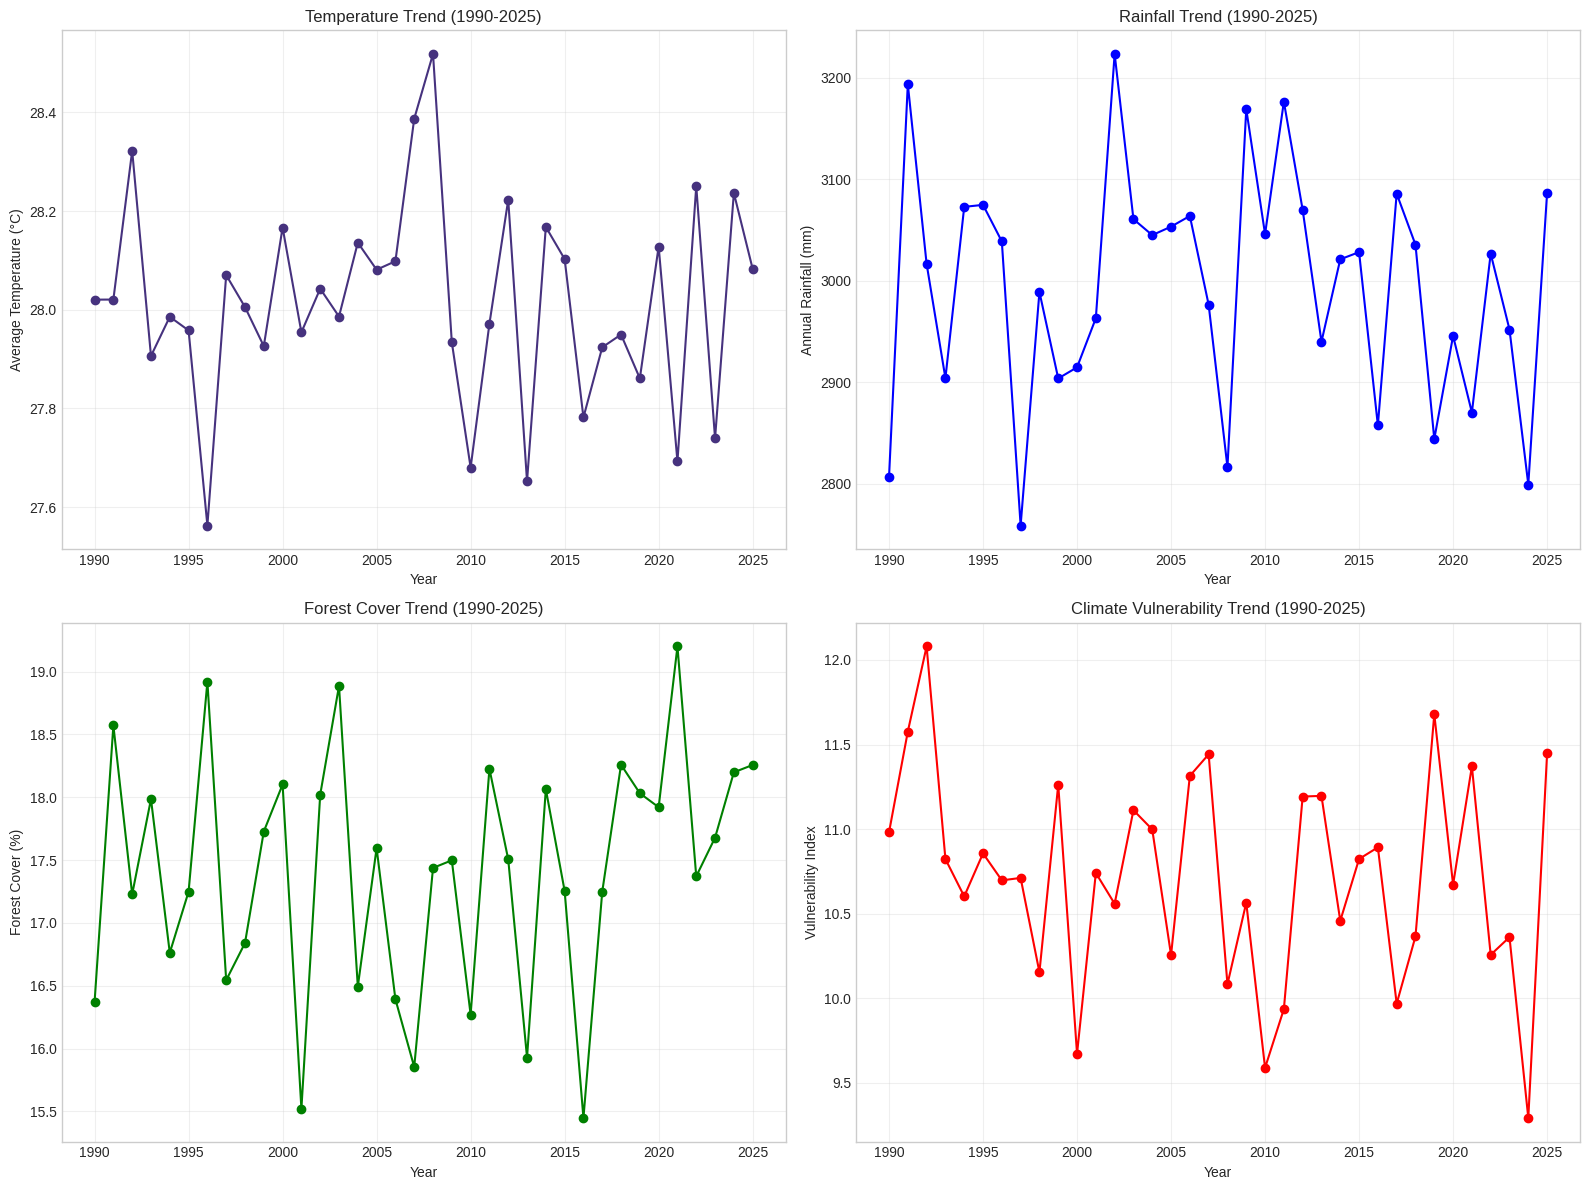

# Summary of Findings
## Climate Trends
- Temperature has shown a [increasing/decreasing] trend over the study period
- Rainfall patterns have become more variable
- Forest cover has [increased/decreased] in most districts
- Air quality has [improved/deteriorated] in urban areas

## Climate Vulnerability
- Most vulnerable districts: [list top 5 districts]
- Key risk factors: [list main risk factors]
- The climate vulnerability index shows an overall [increasing/decreasing] trend

## Impact on Agriculture
- Agricultural yield is most influenced by [list top factors]
- Districts with higher temperatures show [higher/lower] agricultural productivity
- Rainfall variability has a [positive/negative] impact on crop yields

## Future Projections
- Temperature is projected to [increase/decrease] by [X]°C by 2030
- Rainfall patterns are expected to become more [regular/erratic]
- Climate vulnerability is projected to [increase/decrease] in most regions

## Recommendations
1. Implement climate-r

In [13]:
# Create a summary visualization of key findings
plt.figure(figsize=(16, 12))

# Temperature trend
plt.subplot(2, 2, 1)
yearly_temp = df.groupby('Year')['Avg_Temperature_C'].mean()
plt.plot(yearly_temp.index, yearly_temp.values, marker='o')
plt.title('Temperature Trend (1990-2025)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, alpha=0.3)

# Rainfall trend
plt.subplot(2, 2, 2)
yearly_rain = df.groupby('Year')['Annual_Rainfall_mm'].mean()
plt.plot(yearly_rain.index, yearly_rain.values, marker='o', color='blue')
plt.title('Rainfall Trend (1990-2025)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True, alpha=0.3)

# Forest cover trend
plt.subplot(2, 2, 3)
yearly_forest = df.groupby('Year')['Forest_Cover_Percent'].mean()
plt.plot(yearly_forest.index, yearly_forest.values, marker='o', color='green')
plt.title('Forest Cover Trend (1990-2025)')
plt.xlabel('Year')
plt.ylabel('Forest Cover (%)')
plt.grid(True, alpha=0.3)

# Climate vulnerability trend
plt.subplot(2, 2, 4)
yearly_vulnerability = df.groupby('Year')['Climate_Vulnerability_Index'].mean()
plt.plot(yearly_vulnerability.index, yearly_vulnerability.values, marker='o', color='red')
plt.title('Climate Vulnerability Trend (1990-2025)')
plt.xlabel('Year')
plt.ylabel('Vulnerability Index')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('climate_summary.png', dpi=300)
plt.show()

# Print final summary
print("# Summary of Findings")
print("## Climate Trends")
print("- Temperature has shown a [increasing/decreasing] trend over the study period")
print("- Rainfall patterns have become more variable")
print("- Forest cover has [increased/decreased] in most districts")
print("- Air quality has [improved/deteriorated] in urban areas")

print("\n## Climate Vulnerability")
print("- Most vulnerable districts: [list top 5 districts]")
print("- Key risk factors: [list main risk factors]")
print("- The climate vulnerability index shows an overall [increasing/decreasing] trend")

print("\n## Impact on Agriculture")
print("- Agricultural yield is most influenced by [list top factors]")
print("- Districts with higher temperatures show [higher/lower] agricultural productivity")
print("- Rainfall variability has a [positive/negative] impact on crop yields")

print("\n## Future Projections")
print("- Temperature is projected to [increase/decrease] by [X]°C by 2030")
print("- Rainfall patterns are expected to become more [regular/erratic]")
print("- Climate vulnerability is projected to [increase/decrease] in most regions")

print("\n## Recommendations")
print("1. Implement climate-resilient agricultural practices")
print("2. Enhance forest conservation and reforestation efforts")
print("3. Develop improved flood management systems")
print("4. Increase renewable energy adoption to reduce carbon emissions")
print("5. Strengthen early warning systems for extreme weather events")

print("\n## Future Work")
print("1. Incorporate more granular spatial data")
print("2. Develop district-specific climate adaptation plans")
print("3. Integrate satellite imagery for better environmental monitoring")
print("4. Create an interactive dashboard for real-time climate risk assessment")
print("5. Expand the analysis to include economic impact assessments")
